In [1]:
import subprocess
import os
import pandas as pd
import numpy as np
import holidays
import glob
from pathlib import Path

# Install necessary Python libraries locally (instead of using Colab's `!pip`)
subprocess.run(["pip", "install", "geopy"], check=True)
subprocess.run(["pip", "install", "pyjanitor"], check=True)
subprocess.run(["pip", "install", "scikit-learn"], check=True)
subprocess.run(["pip", "install", "shapely"], check=True)
subprocess.run(["pip", "install", "holidays"], check=True)


CompletedProcess(args=['pip', 'install', 'holidays'], returncode=0)

In [1]:
# inflation data - Bank of Canada

import pandas as pd
import os
import glob
import datetime
from pathlib import Path
import numpy as np
import holidays
import csv
# Define the raw GitHub URL for the CSV file
github_url = "https://raw.githubusercontent.com/HICC-LICC/PSDC-Data-Challenge/main/adjusted_inflation.csv"

# Load the inflation data CSV from GitHub
df_inflca = pd.read_csv(github_url)

# Rename columns for better readability
df_inflca.rename(columns={
    "REF_DATE": "date",
    "VALUE": "adjusted national inflation rate",
    "Alternative measures": "measure"
}, inplace=True)

# Convert 'date' column to datetime format
df_inflca['date'] = pd.to_datetime(df_inflca['date'])

# Filter data for dates after 2014
df_inflca = df_inflca[df_inflca['date'].dt.year > 2014]

# Filter based on UOM_ID if the column exists
if 'UOM_ID' in df_inflca.columns:
    df_inflca = df_inflca[df_inflca['UOM_ID'] == 435]

# Filter for a specific inflation measure if the column exists
if 'measure' in df_inflca.columns:
    df_inflca = df_inflca[df_inflca['measure'] == "Measure of core inflation based on a weighted median approach, CPI-median (index, 198901=100)"]

# Keep only the relevant columns
df_inflca = df_inflca[['date', 'adjusted national inflation rate']]

# Display the cleaned DataFrame
print(df_inflca)


           date  adjusted national inflation rate
7755 2015-01-01                             166.8
7766 2015-02-01                             167.0
7777 2015-03-01                             167.3
7788 2015-04-01                             167.4
7799 2015-05-01                             167.8
...         ...                               ...
8965 2024-03-01                             210.1
8976 2024-04-01                             210.4
8987 2024-05-01                             211.0
8998 2024-06-01                             211.6
9009 2024-07-01                             211.8

[115 rows x 2 columns]


In [5]:
# inflation data - statcan

import pandas as pd
import os
import glob
import datetime
from pathlib import Path
import numpy as np
import holidays
import csv

# Define the direct GitHub release download URL for the file
github_url = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/unadjusted_inflation.csv"

# Load the inflation data directly from the GitHub release URL
df_infl = pd.read_csv(github_url)

df_infl['REF_DATE'] = pd.to_datetime(df_infl['REF_DATE'])
df_infl = df_infl[df_infl['REF_DATE'].dt.year > 2014]
df_infl = df_infl[df_infl.UOM_ID == 17]
df_infl = df_infl[df_infl['Products and product groups'].isin(['All-items', 'Shelter'])]

df_infl.rename(columns={
  "GEO": "CMA",
  "REF_DATE": "date",
  "Products and product groups": "product",
  "VALUE": "inflation rate",
}, inplace=True)

df_infl["CMA"].replace({
  'Canada': "CA",
  'Newfoundland and Labrador': "NL",
  "St. John's, Newfoundland and Labrador": "St. John's",
  'Prince Edward Island': "PE",
  'Charlottetown and Summerside, Prince Edward Island': "Charlottetown",
  'Nova Scotia': "NS",
  'Halifax, Nova Scotia': "Halifax",
  'New Brunswick': "NB",
  'Saint John, New Brunswick': "Saint John",
  'Quebec': "QC",
  'Québec, Quebec': "Quebec",
  'Montréal, Quebec': "Montreal",
  'Ontario': "ON",
  'Ottawa-Gatineau, Ontario part, Ontario/Quebec': "Ottawa",
  'Toronto, Ontario': "Toronto",
  'Thunder Bay, Ontario': "Thunder Bay",
  'Manitoba': "MB",
  'Winnipeg, Manitoba': "Winnipeg",
  'Saskatchewan': "SK",
  'Regina, Saskatchewan': "Regina",
  'Saskatoon, Saskatchewan': "Saskatoon",
  'Alberta': "AB",
  'Edmonton, Alberta': "Edmonton",
  'Calgary, Alberta': "Calgary",
  'British Columbia': "BC",
  'Vancouver, British Columbia': "Vancouver",
  'Victoria, British Columbia': "Victoria",
  'Whitehorse, Yukon': "Whitehorse",
  'Yellowknife, Northwest Territories': "Yellowknife",
  'Iqaluit, Nunavut': "Iqualuit"
}, inplace=True)

df_infl = df_infl[
  ['date',
  'CMA',
  'product',
  'inflation rate'
  ]]

df_infl = df_infl.pivot_table('inflation rate', ['date', 'CMA'], 'product')
df_infl = df_infl.reset_index()

df_infl.rename(columns={
  "All-items": "inflation_all",
  "Shelter": "inflation_shelter",
}, inplace=True)

df_infl


C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\881293538.py:16: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_infl = pd.read_csv(github_url)
C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\881293538.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_infl["CMA"].replace({


product,date,CMA,inflation_all,inflation_shelter
0,2015-01-01,AB,131.0,163.9
1,2015-01-01,BC,118.0,114.0
2,2015-01-01,CA,124.3,133.1
3,2015-01-01,Calgary,131.7,164.3
4,2015-01-01,Charlottetown,126.3,128.5
...,...,...,...,...
3445,2024-07-01,Vancouver,159.1,167.2
3446,2024-07-01,Victoria,152.9,152.2
3447,2024-07-01,Whitehorse,160.6,211.4
3448,2024-07-01,Winnipeg,162.0,191.5


In [6]:
# employment data

import pandas as pd
import requests
import io

# Clean employment data

# Define the URL to the release download file
github_url = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/adjusted_employment.csv"

# Download the CSV file from the GitHub release URL
response = requests.get(github_url)

# Load the content directly into a pandas DataFrame
df_empl = pd.read_csv(io.StringIO(response.text))

df_empl['REF_DATE'] = pd.to_datetime(df_empl['REF_DATE'])
df_empl = df_empl[df_empl['REF_DATE'].dt.year > 2014]
df_empl = df_empl[df_empl['Labour force characteristics'].isin(['Unemployment rate'])]
df_empl = df_empl[df_empl['Statistics'].isin(['Estimate'])]
df_empl = df_empl[df_empl['Data type'].isin(['Seasonally adjusted'])]

df_empl.rename(columns={
  "GEO": "province",
  "REF_DATE": "date",
  "VALUE": "unemployment rate"
}, inplace=True)

df_empl["province"].replace({
  'Canada': "CA",
  'Newfoundland and Labrador': "NL",
  'Prince Edward Island': "PE",
  'Nova Scotia': "NS",
  'New Brunswick': "NB",
  'Quebec': "QC",
  'Ontario': "ON",
  'Manitoba': "MB",
  'Saskatchewan': "SK",
  'Alberta': "AB",
  'British Columbia': "BC",
}, inplace=True)

df_empl = df_empl[
  ['date',
  'province',
  'unemployment rate'
  ]]

df_empl

C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\3546807711.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_empl = pd.read_csv(io.StringIO(response.text))
C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\3546807711.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_empl["province"].replace({


,date,province,unemployment rate
162833,2015-01-01,CA,6.7
162865,2015-01-01,NL,11.9
162897,2015-01-01,"St. John's, Newfoundland and Labrador",6.0
162929,2015-01-01,PE,10.8
162961,2015-01-01,NS,8.6
...,...,...,...
339313,2024-07-01,BC,5.4
339345,2024-07-01,"Kelowna, British Columbia",4.4
339377,2024-07-01,"Abbotsford-Mission, British Columbia",6.3
339409,2024-07-01,"Vancouver, British Columbia",5.8


In [7]:
# employment data

import pandas as pd
import requests
import io

# Clean employment data

# Define the URL to the release download file
github_url = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/unadjusted_employment.csv"

# Download the CSV file from the GitHub release URL
response = requests.get(github_url)

# Load the content directly into a pandas DataFrame
df_empl = pd.read_csv(io.StringIO(response.text))

df_empl['REF_DATE'] = pd.to_datetime(df_empl['REF_DATE'])
df_empl = df_empl[df_empl['REF_DATE'].dt.year > 2014]
df_empl = df_empl[df_empl['Labour force characteristics'].isin(['Unemployment rate'])]
df_empl = df_empl[df_empl['Sex'].isin(['Both sexes'])]
df_empl = df_empl[df_empl['Age group'].isin(['15 years and over'])]
df_empl = df_empl[df_empl['Population centre and rural areas'].isin(['Census metropolitan area and census agglomeration'])]

df_empl.rename(columns={
  "GEO": "province",
  "REF_DATE": "date",
  "VALUE": "unemployment rate"
}, inplace=True)

df_empl["province"].replace({
  'Canada': "CA",
  'Newfoundland and Labrador': "NL",
  'Prince Edward Island': "PE",
  'Nova Scotia': "NS",
  'New Brunswick': "NB",
  'Quebec': "QC",
  'Ontario': "ON",
  'Manitoba': "MB",
  'Saskatchewan': "SK",
  'Alberta': "AB",
  'British Columbia': "BC",
}, inplace=True)

df_empl = df_empl[
  ['date',
  'province',
  'unemployment rate'
  ]]

df_empl

C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\2804554237.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_empl["province"].replace({


,date,province,unemployment rate
1142019,2015-01-01,CA,6.9
1144179,2015-01-01,NL,7.9
1146339,2015-01-01,PE,10.5
1148499,2015-01-01,NS,8.6
1150659,2015-01-01,NB,8.5
...,...,...,...
3863619,2024-07-01,ON,7.7
3865779,2024-07-01,MB,6.8
3867939,2024-07-01,SK,6.2
3870099,2024-07-01,AB,7.5


In [12]:
# Clean Alberta Data

import pandas as pd
import requests
import io

# Define the direct GitHub release download link
github_url = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/shelter_alberta.xlsx"

# Download the Excel file from GitHub
response = requests.get(github_url)

# Load the content directly into a pandas DataFrame
df = pd.read_excel(io.BytesIO(response.content), engine='openpyxl')

# Display the first few rows of the dataframe
df.head()



,date,city,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,year,month
0,4/1/2013,Edmonton,Women Emergency,WEAC,WEAC,NaN,75.0,65.0,NaN,2013,4
1,4/1/2013,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,Intox Centre,70.0,74.0,NaN,2013,4
2,4/1/2013,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,Herb Jamieson Centre,250.0,253.0,NaN,2013,4
3,4/1/2013,Edmonton,Winter Emergency,Hope Mission - Mat Emergency Shelter Program,Hope Mission,Mat Emergency Shelter Program,200.0,152.0,NaN,2013,4
4,4/1/2013,Edmonton,Youth Emergency,Hope Mission - Youth,Hope Mission,Youth,60.0,51.0,NaN,2013,4


In [13]:
#alberta
df_alberta = df

#find day of the week
df_alberta['date'] = pd.to_datetime(df['date'])
df_alberta["day_week"] = df_alberta["date"].dt.dayofweek
df_alberta["day_week"].replace({
    0 : '1-mon',
    1 : '2-tue',
    2 : '3-wed',
    3 : '4-thu',
    4 : '5-fri',
    5 : '6-sat',
    6 : '7-sun',
}, inplace=True)

#find month
df_alberta["month"].replace({
    1 : '01-jan',
    2 : '02-feb',
    3 : '03-mar',
    4 : '04-apr',
    5 : '05-may',
    6 : '06-jun',
    7 : '07-jul',
    8 : '08-aug',
    9 : '09-sep',
    10 : '10-oct',
    11 : '11-nov',
    12 : '12-dec'
}, inplace=True)

#find last week of the month
df_alberta['Date_Month_End'] = df_alberta['date'] + pd.offsets.MonthEnd(n=0)
df_alberta['Date_Month_End'] = df_alberta["Date_Month_End"].dt.day
df_alberta['day_month'] = df_alberta["date"].dt.day
df_alberta['last_week'] = np.where((df_alberta["Date_Month_End"] - df_alberta['day_month'])  < 8, 1, 0)

#find first week of the month
df_alberta['first_week'] = np.where(df_alberta['day_month']  < 8, 1, 0)


#find provincial holidays
#df_alberta['hols'] = pd.Series(df.index).apply(lambda x: holidays.CountryHoliday('CAN',prov='ON').get(x)).values

#df_alberta['hols_bi'] = df_alberta['hols']
#df_alberta['hols_bi'] = np.where(df_alberta['hols'] == "", 0, 1)

#remove closed shelters
df_alberta.loc[df_alberta['Capacity'] == 0,'Capacity'] = np.nan
df_alberta['occupancy_rate'] = df_alberta['Overnight'] / df_alberta['Capacity']

df_alberta = df_alberta[
  ['date',
  'city',
  'ShelterType',
  'ShelterName',
  'Organization',
  'Capacity',
  'Overnight',
  'year',
  'month',
  'occupancy_rate',
  'day_week',
  'last_week',
  'first_week'
  ]]

df_alberta['date'] = df_alberta['date'].astype('datetime64[ns]')

df_alberta


C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\3477750829.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_alberta["day_week"].replace({
C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\3477750829.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

,date,city,ShelterType,ShelterName,Organization,Capacity,Overnight,year,month,occupancy_rate,day_week,last_week,first_week
0,2013-04-01,Edmonton,Women Emergency,WEAC,WEAC,75.0,65.0,2013,04-apr,0.866667,1-mon,0,1
1,2013-04-01,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,70.0,74.0,2013,04-apr,1.057143,1-mon,0,1
2,2013-04-01,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,250.0,253.0,2013,04-apr,1.012000,1-mon,0,1
3,2013-04-01,Edmonton,Winter Emergency,Hope Mission - Mat Emergency Shelter Program,Hope Mission,200.0,152.0,2013,04-apr,0.760000,1-mon,0,1
4,2013-04-01,Edmonton,Youth Emergency,Hope Mission - Youth,Hope Mission,60.0,51.0,2013,04-apr,0.850000,1-mon,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271536,2024-07-31,Edmonton,Adult Emergency,Navigation & Support Centre,Hope Mission,20.0,3.0,2024,07-jul,0.150000,3-wed,1,0
271537,2024-07-31,Edmonton,Winter Emergency,Pimatisiwin Trailers,Niginan Housing Ventures,NaN,0.0,2024,07-jul,NaN,3-wed,1,0
271538,2024-07-31,Edmonton,Adult Emergency,Maskokamik Shelter,Enoch Cree Nation,100.0,40.0,2024,07-jul,0.400000,3-wed,1,0
271539,2024-07-31,Edmonton,Adult Emergency,Karis Centre,Hope Mission,80.0,81.0,2024,07-jul,1.012500,3-wed,1,0


In [14]:
#merge weather files
import pandas as pd
import requests
from io import StringIO

# List of direct download URLs
urls = [
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Bow.Valley.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Bow.Valley.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Calgary.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Cold.Lake.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Cold.Lake.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Edmonton.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Edson.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Fort.McMurray.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Grande.Prairie.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Grande.Prairie.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Lac.La.Biche.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Lethbridge.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Lloyminster.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Medicine.Hat.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Peace.River.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Peace.River.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Red.Deer.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Red.Deer.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Red.Deer.3.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Slave.Lake.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Toronto.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Westaskiwin.csv"
]

# Create an empty list to store dataframes
flist = []

# Download and read each CSV file
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        df_temp = pd.read_csv(StringIO(response.text))
        flist.append(df_temp)
    else:
        print(f"Failed to download: {url}")

# Concatenate all the dataframes into one
df_weather = pd.concat(flist, axis=0, ignore_index=True)

# Remove entries earlier than 2014
df_weather = df_weather[df_weather['LOCAL_YEAR'] >= 2014]

# Rename station names to city names
df_weather["STATION_NAME"].replace({
    'BOW VALLEY': 'Bow Valley',
    'CALGARY INTL A': 'Calgary',
    'COLD LAKE A': 'Cold Lake',
    'EDMONTON INTERNATIONAL CS': 'Edmonton',
    'EDSON': 'Edson',
    'FORT MCMURRAY A': 'Fort McMurray',
    'GRANDE PRAIRIE A': 'Grande Prairie',
    'LAC LA BICHE CLIMATE': 'Lac La Biche',
    'LETHBRIDGE': 'Lethbridge',
    'LLOYDMINSTER': 'Lloydminster',
    'MEDICINE HAT': 'Medicine Hat',
    'PEACE RIVER A': 'Peace River',
    'RED DEER A': 'Red Deer',
    'RED DEER REGIONAL A': 'Red Deer',
    'SLAVE LAKE': 'Slave Lake',
    'WETASKIWIN AGCM': 'Wetaskiwin',
}, inplace=True)

# Convert 'LOCAL_DATE' to datetime and keep only the date part
df_weather['LOCAL_DATE'] = pd.to_datetime(df_weather['LOCAL_DATE']).dt.date

# Sort data by station name and date
df_weather = df_weather.sort_values(by=['STATION_NAME', 'LOCAL_DATE'])

# Interpolate missing temperature data
df_weather['MIN_TEMPERATURE'] = df_weather['MIN_TEMPERATURE'].interpolate()
df_weather['MAX_TEMPERATURE'] = df_weather['MAX_TEMPERATURE'].interpolate()
df_weather['MEAN_TEMPERATURE'] = df_weather['MEAN_TEMPERATURE'].interpolate()

# Replace missing precipitation values with 0
df_weather.update(df_weather[['TOTAL_PRECIPITATION']].fillna(0))

# Keep relevant columns
df_weather = df_weather[
  ['STATION_NAME', 'MEAN_TEMPERATURE', 'TOTAL_PRECIPITATION', 'LOCAL_DATE',
   'MIN_TEMPERATURE', 'MAX_TEMPERATURE', 'PROVINCE_CODE', 'x', 'y']
]

# Rename columns for clarity
df_weather.rename(columns={
    "STATION_NAME": "city",
    "MEAN_TEMPERATURE": "mean_temperature",
    "TOTAL_PRECIPITATION": "total_precipitation",
    "LOCAL_DATE": "date",
    "MIN_TEMPERATURE": "min_temperature",
    "MAX_TEMPERATURE": "max_temperature",
    "PROVINCE_CODE": "province"
}, inplace=True)

# Ensure the 'date' column is in the correct datetime format
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Display the cleaned dataframe
df_weather.head()




C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\2872354318.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather["STATION_NAME"].replace({


,city,mean_temperature,total_precipitation,date,min_temperature,max_temperature,province,x,y
7363,Bow Valley,-6.4,0.0,2014-01-01,-15.9,3.2,AB,-115.066667,51.083333
7364,Bow Valley,4.9,0.0,2014-01-02,2.2,7.6,AB,-115.066667,51.083333
7365,Bow Valley,-2.4,5.2,2014-01-03,-7.1,2.4,AB,-115.066667,51.083333
7366,Bow Valley,-17.6,4.1,2014-01-04,-28.1,-7.0,AB,-115.066667,51.083333
7367,Bow Valley,-22.6,0.0,2014-01-05,-34.6,-10.5,AB,-115.066667,51.083333


In [15]:
import os
import subprocess
import pandas as pd

# Load the census data directly from GitHub release URL
url = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/census.1.csv"
df_census = pd.read_csv(url, encoding='ISO-8859-1')

#keep only census
df_census["GEO_NAME"].replace({
    'Calgary, City (CY)' : 'Calgary',
    'Cold Lake, City (CY)' : 'Cold Lake',
    'Drayton Valley, Town (T)' : 'Drayton Valley',
    'Edmonton, City (CY)' : 'Edmonton',
    'Edson, Town (T)' : 'Edson',
    'Grande Prairie, City (CY)' : 'Grande Prairie',
    'Lac la Biche County, Specialized municipality (SM)' : 'Lac La Biche',
    'Leduc, City (CY)' : 'Leduc',
    'Lethbridge, City (CY)' : 'Lethbridge',
    'Lloydminster (Part), City (CY)' : 'Lloydminster',
    'Medicine Hat, City (CY)' : 'Medicine Hat',
    'Peace River, Town (T)' : 'Peace River',
    'Red Deer, City (CY)' : 'Red Deer',
    'Slave Lake, Town (T)' : 'Slave Lake',
    'Spring Lake, Village (VL)' : 'Spruce Grove',
    'Wetaskiwin, City (CY)' : 'Wetaskiwin'
}, inplace=True)

# Rest of your code remains exactly the same...

list_cities = df_alberta['city'].unique().tolist()
list_cities.sort()

df_census = df_census.loc[df_census["GEO_NAME"].isin(list_cities)]


list_characteristics = [1,3,4,5, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 252, 253, 360, 361, 363, 364, 379, 380, 381, 382, 1482, 1483, 1484, 1486, 1488, 1490, 1491, 1492, 1494, 1496, 1497, 1498, 1499, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1535, 1536, 1537, 1983, 1984, 1985, 1986, 1987, 1988, 1991, 2014, 2015, 2016, 2017, 2228, 2229, 2230, 2239, 2240, 2241, 2242, 2245]
df_census = df_census.loc[df_census["CHARACTERISTIC_ID"].isin(list_characteristics)]

#keep relevant columns
df_census = df_census[
  ['CENSUS_YEAR',
  'GEO_NAME',
   'CHARACTERISTIC_ID',
  'CHARACTERISTIC_NAME',
  'C1_COUNT_TOTAL'
  ]]

df_census.rename(columns={
    'CENSUS_YEAR' : 'year',
    'GEO_NAME' : 'city'
}, inplace =True )

#create pivot table
df_census = pd.pivot_table(df_census, values="C1_COUNT_TOTAL", index=["city"], columns=["CHARACTERISTIC_NAME"])\

df_census = df_census.reset_index()

#clean pivot table
df_census.rename(columns={
  '      2011 to 2015' : 'immigrant status - immigrants - 2011-2015',
  '      2016 to 2021' : 'immigrant status - immigrants - 2016-202l',
  '      External migrants' : 'migrant 5 years - movers - migrants - external',
  '      Internal migrants' : 'migrant 5 years - movers - migrants - internal',
  '      Permanent position' : 'workers - empoyee - permanent',
  '      Temporary position' : 'workers - employee - temporary',
  '    1980 to 1990' : 'immigrant status - immigrants - 1980-1990',
  '    1991 to 2000' : 'immigrant status - immigrants - 1991-2000',
  '    2001 to 2010' : 'immigrant status - immigrants - 2001-2010',
  '    Before 1980' : 'immigrant status - immigrants - before 1980',
  '    Employee' : 'workers - employee - total',
  '    Migrants' : 'migrants 5 years - movers - migrants - total',
  '    Non-migrants' : 'migrants 5 years - movers - non-migrants',
  '    Self-employed' : 'workers - self-employed',
  '  % of owner households spending 30% or more of its income on shelter costs' : 'dwelling owners (%) - spending over 30% in shelter',
  '  % of owner households with a mortgage' : 'dwelling owners (%) - with mortgage',
  '  % of tenant households in subsidized housing' : 'dwelling tenants (%) - in subsidized housing',
  '  % of households living in a dwelling provided by the local government, First Nation or Indian band spending more than 30% on shelter costs' : 'dwelling government (%) - spending over 30% in shelter',
  '  % of tenant households spending 30% or more of its income on shelter costs' : 'dwelling tenants (%) - spending over 30% in shelter',
  '  0 to 14 years' : 'age group (%) - 0-14 years',
  '  0 to 17 years (%)' : 'LICO-AT (%) - 0-17 years',
  '  1 person' : 'household size - 1 person',
  '  15 to 64 years' : 'age group (%) - 15-64 years',
  '  18 to 64 years (%)' : 'LICO-AT (%) - 18-64 years',
  '  2 persons' : 'household size - 2 persons',
  '  3 persons' : 'household size - 3 persons',
  '  4 persons' : 'household size - 4 persons',
  '  5 or more persons' : 'household size - 5 or more persons',
  '  65 years and over' : 'age group (%) - 65+ years',
  '  65 years and over (%)' : 'LICO-AT (%) - 65+ years',
  '  All classes of workers' : 'workers - total',
  '  Apartment in a building that has fewer than five storeys' : 'type of dwelling - apartment in a building that has fewer than five storeys',
  '  Apartment in a building that has five or more storeys' : 'type of dwelling - apartment in a building that has five or more storeys',
  '  Apartment or flat in a duplex' : 'type of dwelling - apartment or flat in a duplex',
  '  Apartment or flat in a multi-family building' : 'type of dwelling - apartment or flat in a multi-family building',
  '  Median after-tax income of household in 2020 ($)' : 'after-tax income of household ($) - average',
  '  Average after-tax income of household in 2020 ($)' : 'after-tax income of household ($) - average',
  '  Average total income of household in 2020 ($)' : 'total income of household ($) - average',
  '  Median total income of household in 2020 ($)' : 'total income of household ($) - median',
  '  Gini index on adjusted household after-tax income' : 'Gini index - adjusted household after-tax income',
  '  Gini index on adjusted household market income' : 'Gini index - adjusted household market income',
  '  Gini index on adjusted household total income' : 'Gini index - adjusted household total income',
  '  High (secondary) school diploma or equivalency certificate' : "education - high school or equivalent",
  '  Immigrants' : 'immigrant status - immigrants - total',
  '  Median monthly shelter costs for owned dwellings ($)' : 'dwelling owners ($) - median shelter costs',
  '  Median monthly shelter costs for rented dwellings ($)' : 'dwelling tenants ($) - median shelter costs',
  '  Median monthly shelter costs for dwellings provided by local government, First Nation or Indian band ($)' : 'dwelling government - median shelter costs',
  '  Median value of dwellings ($)' : 'dwelling owners ($) - median value of dwelling',
  '  Movable dwelling' : 'type of dwelling - moving dwelling',
  '  Movers' : 'migrant 5 years - movers - total',
  '  No certificate, diploma or degree' : "education - no certificate",
  '  Non-immigrants' : 'immigrant status - non-immigrants',
  '  Non-movers' : 'migrant 5 years - non-movers',
  '  Non-permanent residents' : 'immigrant status - non-permanant residents',
  '  Other single-attached house' : 'type of dwelling - other single-attached house',
  '  P90/P10 ratio on adjusted household after-tax income' : 'P90/P10 - adjusted household after-tax income',
  '  Postsecondary certificate, diploma or degree' : "education - post secondary",
  '  Row house' : 'type of dwelling - rowhouse',
  '  Semi-detached house' : 'type of dwelling - semi-detached house',
  '  Single-detached house' : 'type of dwelling - single-detached house',
  'Average household size' : 'household size - average',
  'Employment rate' : 'labor force (%) - employment rate',
  'Median age of the population' : 'age group - median age',
  'Participation rate' : 'labor force (%) - participation rate',
  'Population percentage change, 2016 to 2021' : 'population - change from 2016-2021',
  'Population, 2021' : 'population - number',
  'Prevalence of low income based on the Low-income cut-offs, after tax (LICO-AT) (%)' : "LICO-AT (%) - All",
  'Private dwellings occupied by usual residents' : 'private dwelling - user occupied',
  'Total - Highest certificate, diploma or degree for the population aged 25 to 64 years in private households - 25% sample data' : "education - total",
  'Total - Households living in a dwelling provided by the local government, First Nation or Indian band in non-farm private dwellings - 25% sample data' : 'dwelling government - total',
  'Total - Immigrant status and period of immigration for the population in private households - 25% sample data' : 'immigrant status - total',
  'Total - Mobility status 5 years ago - 25% sample data' : 'migrant 5 years - total',
  'Total - Occupied private dwellings by structural type of dwelling - 100% data' : 'type of dwelling - total',
  'Total - Owner households in non-farm, non-reserve private dwellings - 25% sample data' : 'dwelling owners - total',
  'Total - Private households by household size - 100% data' : 'household size - total',
  'Total - Tenant households in non-farm, non-reserve private dwellings - 25% sample data' : 'dwelling tenants - total',
  'Total private dwellings' : 'private dwelling - total',
  'Unemployment rate' : 'labor force (%) - unemployment rate',
  'GEO_NAME	' : 'city'
}, inplace =True )

#Make sure sums are correct
type_of_dwelling = [
  'type of dwelling - apartment in a building that has fewer than five storeys',
  'type of dwelling - apartment in a building that has five or more storeys',
  'type of dwelling - apartment or flat in a duplex',
  'type of dwelling - moving dwelling',
  'type of dwelling - other single-attached house',
  'type of dwelling - rowhouse',
  'type of dwelling - semi-detached house',
  'type of dwelling - single-detached house'
  ]

df_census['type of dwelling - total'] = df_census[type_of_dwelling].sum(axis=1)

df_census[type_of_dwelling] = (df_census[type_of_dwelling].div(df_census['type of dwelling - total'], axis=0)*100).apply(lambda x: round(x, 1))


##

household_size = [
 'household size - 1 person',
 'household size - 2 persons',
 'household size - 3 persons',
 'household size - 4 persons',
 'household size - 5 or more persons'
]

df_census['household size - total'] = df_census[household_size].sum(axis=1)

df_census[household_size] = (df_census[household_size].div(df_census['household size - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

immigrant_status_1 = [
 'immigrant status - immigrants - 1980-1990',
 'immigrant status - immigrants - 1991-2000',
 'immigrant status - immigrants - 2001-2010',
 'immigrant status - immigrants - 2011-2015',
 'immigrant status - immigrants - 2016-202l',
 'immigrant status - immigrants - before 1980'
]

df_census['immigrant status - immigrants - total'] = df_census[immigrant_status_1].sum(axis=1)

immigrant_status_2 = [
 'immigrant status - immigrants - total',
 'immigrant status - non-permanant residents',
 'immigrant status - non-immigrants',
]

df_census['immigrant status - total'] = df_census[immigrant_status_2].sum(axis=1)

immigrant_status_3 = [
 'immigrant status - immigrants - 1980-1990',
 'immigrant status - immigrants - 1991-2000',
 'immigrant status - immigrants - 2001-2010',
 'immigrant status - immigrants - 2011-2015',
 'immigrant status - immigrants - 2016-202l',
 'immigrant status - immigrants - before 1980',
 'immigrant status - non-permanant residents',
 'immigrant status - non-immigrants'
]

df_census[immigrant_status_3] = (df_census[immigrant_status_3].div(df_census['immigrant status - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

migrants_1 = [
 'migrant 5 years - movers - migrants - external',
 'migrant 5 years - movers - migrants - internal'
]

df_census['migrants 5 years - movers - migrants - total'] = df_census[migrants_1].sum(axis=1)


migrants_2 = [
 'migrants 5 years - movers - migrants - total',
 'migrants 5 years - movers - non-migrants'
]

df_census['migrant 5 years - movers - total'] = df_census[migrants_2].sum(axis=1)

migrants_3 = [
 'migrant 5 years - non-movers',
 'migrant 5 years - movers - total'
]

migrants_4 = [
 'migrant 5 years - movers - migrants - external',
 'migrant 5 years - movers - migrants - internal',
 'migrants 5 years - movers - non-migrants',
 'migrant 5 years - non-movers'
]

df_census['migrant 5 years - total'] = df_census[migrants_3].sum(axis=1)

df_census[migrants_4] = (df_census[migrants_4].div(df_census['migrant 5 years - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

education = [
 'education - high school or equivalent',
 'education - no certificate',
 'education - post secondary'
]

df_census['education - total'] = df_census[education].sum(axis=1)

df_census[education] = (df_census[education].div(df_census['education - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

workers_1 = [
 'workers - employee - temporary',
 'workers - empoyee - permanent'
]

df_census['workers - employee - total'] = df_census[workers_1].sum(axis=1)

workers_2 = [
 'workers - self-employed',
 'workers - employee - total'
]

df_census['workers - total'] = df_census[workers_2].sum(axis=1)

workers_3 = [
 'workers - employee - temporary',
 'workers - empoyee - permanent',
 'workers - self-employed'
]

df_census[workers_3] = (df_census[workers_3].div(df_census['workers - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

ownership = [
 'dwelling government - total',
 'dwelling owners - total',
 'dwelling tenants - total'
]

df_census['dwelling ownership - total'] = df_census[ownership].sum(axis=1)
df_census[ownership] = (df_census[ownership].div(df_census['dwelling ownership - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

df_census['private dwelling - user occupied'] = (df_census['private dwelling - user occupied'].div(df_census['private dwelling - total'], axis=0)*100).apply(lambda x: round(x, 1))

#drop all totals

totals = [
 'type of dwelling - total',
 'household size - total',
 'immigrant status - immigrants - total',
 'immigrant status - total',
 'migrants 5 years - movers - migrants - total',
 'migrant 5 years - movers - total',
 'migrant 5 years - total',
 'education - total',
 'workers - employee - total',
 'workers - total',
 'type of dwelling - total',
 'dwelling ownership - total',
 'private dwelling - total'
]

df_census = df_census.drop(columns=totals)

df_census.rename(columns={
 'age group - median age' : 'age group (#) - median age',
 'dwelling government - total' :  'dwelling - government (%)',
 'dwelling owners - total' :  'dwelling - owners (%)',
 'dwelling tenants - total' :  'dwelling - tenants (%)',
 'education - high school or equivalent' :  'education (%) - high school or equivalent',
 'education - no certificate' :  'education (%) - no certificate',
 'education - post secondary' :  'education (%) - post secondary',
 'household size - 1 person' :  'household size (%) - 1 person',
 'household size - 2 persons' :  'household size (%) - 2 persons',
 'household size - 3 persons' :  'household size (%) - 3 persons',
 'household size - 4 persons' :  'household size (%) - 4 persons',
 'household size - 5 or more persons' :  'household size (%) - 5 or more persons',
 'household size - average' : 'household size (#) - average',
 'immigrant status - immigrants - 1980-1990' :  'immigrant status (%) - immigrants - 1980-1990',
 'immigrant status - immigrants - 1991-2000' :  'immigrant status (%) - immigrants - 1991-2000',
 'immigrant status - immigrants - 2001-2010' :  'immigrant status (%) - immigrants - 2001-2010',
 'immigrant status - immigrants - 2011-2015' :  'immigrant status (%) - immigrants - 2011-2015',
 'immigrant status - immigrants - 2016-202l' :  'immigrant status (%) - immigrants - 2016-202l',
 'immigrant status - immigrants - before 1980' :  'immigrant status (%) - immigrants - before 1980',
 'immigrant status - non-immigrants' :  'immigrant status (%) - non-immigrants',
 'immigrant status - non-permanant residents' :  'immigrant status (%) - non-permanant residents',
 'migrant 5 years - movers - migrants - external' :  'migrant 5 years (%) - movers - migrants - external',
 'migrant 5 years - movers - migrants - internal' :  'migrant 5 years (%) - movers - migrants - internal',
 'migrant 5 years - non-movers' :  'migrant 5 years (%) - non-movers',
 'migrants 5 years - movers - non-migrants' :  'migrants 5 years (%) - movers - non-migrants',
 'private dwelling - user occupied' : 'private dwelling (%) - user occupied',
 'population - change from 2016-2021' :  'population (%) - change from 2016-2021',
 'population - number' :  'population (#) - number',
 'type of dwelling - apartment in a building that has fewer than five storeys' :  'type of dwelling (%) - apartment in a building that has fewer than five storeys',
 'type of dwelling - apartment in a building that has five or more storeys' :  'type of dwelling (%) - apartment in a building that has five or more storeys',
 'type of dwelling - apartment or flat in a duplex' :  'type of dwelling (%) - apartment or flat in a duplex',
 'type of dwelling - moving dwelling' :  'type of dwelling (%) - moving dwelling',
 'type of dwelling - other single-attached house' :  'type of dwelling (%) - other single-attached house',
 'type of dwelling - rowhouse' :  'type of dwelling (%) - rowhouse',
 'type of dwelling - semi-detached house' :  'type of dwelling (%) - semi-detached house',
 'type of dwelling - single-detached house' :  'type of dwelling (%) - single-detached house',
 'workers - employee - temporary' :  'workers (%) - employee - temporary',
 'workers - empoyee - permanent' :  'workers (%) - empoyee - permanent',
 'workers - self-employed' :  'workers (%) - self-employed'
}, inplace =True )

df_census = df_census.reindex(sorted(df_census.columns), axis=1)

df_census

C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\3352473809.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_census["GEO_NAME"].replace({


CHARACTERISTIC_NAME,Gini index - adjusted household after-tax income,Gini index - adjusted household market income,Gini index - adjusted household total income,LICO-AT (%) - 0-17 years,LICO-AT (%) - 18-64 years,LICO-AT (%) - 65+ years,LICO-AT (%) - All,P90/P10 - adjusted household after-tax income,after-tax income of household ($) - average,age group (#) - median age,...,type of dwelling (%) - apartment in a building that has five or more storeys,type of dwelling (%) - apartment or flat in a duplex,type of dwelling (%) - moving dwelling,type of dwelling (%) - other single-attached house,type of dwelling (%) - rowhouse,type of dwelling (%) - semi-detached house,type of dwelling (%) - single-detached house,workers (%) - employee - temporary,workers (%) - empoyee - permanent,workers (%) - self-employed
0,0.327,0.471,0.376,5.8,6.2,3.5,5.8,4.1,104900.0,38.0,...,8.1,4.2,0.4,0.0,9.7,6.3,55.0,13.8,70.8,15.4
1,0.255,0.367,0.290,2.2,2.2,0.9,2.1,3.3,98800.0,32.4,...,0.0,0.7,4.5,0.0,4.4,10.6,65.7,16.9,75.8,7.3
2,0.272,0.417,0.307,2.3,3.1,2.0,2.7,3.4,85700.0,37.6,...,0.0,1.9,9.8,0.2,2.1,6.7,62.7,13.0,74.1,13.0
3,0.296,0.444,0.334,6.6,6.7,3.1,6.2,3.8,92900.0,36.8,...,7.4,2.6,0.5,0.0,9.8,7.1,49.6,15.9,71.6,12.5
4,0.262,0.392,0.296,2.2,2.9,1.0,2.5,3.5,92700.0,38.4,...,0.0,1.2,13.3,0.3,5.0,2.1,60.6,12.0,74.6,13.4
5,0.254,0.369,0.284,3.6,3.1,1.8,3.1,3.3,95000.0,34.0,...,0.6,4.5,3.4,0.0,4.4,7.1,61.6,13.0,75.5,11.5
6,0.290,0.429,0.323,3.9,2.5,1.6,2.7,3.8,93600.0,41.6,...,0.0,1.0,11.9,0.0,1.5,1.2,78.6,15.9,62.7,21.4
7,0.257,0.383,0.290,2.9,2.6,1.0,2.5,3.2,97100.0,36.8,...,3.2,1.2,2.7,0.0,8.6,8.8,63.2,13.5,75.8,10.7
8,0.272,0.418,0.306,3.5,4.8,1.3,4.0,3.4,84700.0,38.0,...,2.1,7.6,1.9,0.0,6.1,6.2,62.6,14.4,73.8,11.8
9,0.286,0.414,0.322,3.2,3.4,1.4,3.1,3.7,97200.0,37.6,...,0.5,0.9,2.7,0.0,4.2,2.8,68.5,12.7,72.6,14.7


In [16]:
#merge datasets

df.drop(df.index, inplace=True)

#merge shelter, census and weather datasets
df = pd.merge(df_alberta, df_census, on='city')
df = pd.merge(df, df_weather, on=['city', 'date'])

#merge inflation dataset
df['month'] = df['date'].dt.strftime('%Y-%m')
df_infl['month'] = df_infl['date'].dt.strftime('%Y-%m')
df_empl['month'] = df_empl['date'].dt.strftime('%Y-%m')
df_inflca['month'] = df_inflca['date'].dt.strftime('%Y-%m')

df_infl = df_infl.drop(columns=['date'])
df_empl = df_empl.drop(columns=['date'])
df_inflca = df_inflca.drop(columns=['date'])

df["CMA"] = df["city"]
df.loc[~df['CMA'].isin(['Edmonton', 'Calgary']), 'CMA'] = 'AB'

df = pd.merge(df, df_infl, on=['CMA', 'month'])
df = pd.merge(df, df_empl, on=['province', 'month'])
df = pd.merge(df, df_inflca, on=['month'])

df

,date,city,ShelterType,ShelterName,Organization,Capacity,Overnight,year,month,occupancy_rate,...,min_temperature,max_temperature,province,x,y,CMA,inflation_all,inflation_shelter,unemployment rate,adjusted national inflation rate
0,2015-01-01,Edmonton,Women Emergency,WEAC,WEAC,66.0,68.0,2015,2015-01,1.030303,...,-9.2,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8
1,2015-01-01,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,70.0,70.0,2015,2015-01,1.000000,...,-9.2,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8
2,2015-01-01,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,250.0,214.0,2015,2015-01,0.856000,...,-9.2,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8
3,2015-01-01,Edmonton,Winter Emergency,Hope Mission - Herb Jamieson Winter Emergency,Hope Mission,60.0,60.0,2015,2015-01,1.000000,...,-9.2,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8
4,2015-01-01,Edmonton,Winter Emergency,Hope Mission - Mat Emergency Shelter Program,Hope Mission,200.0,170.0,2015,2015-01,0.850000,...,-9.2,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226918,2024-07-16,Edmonton,Adult Emergency,Navigation & Support Centre,Hope Mission,20.0,7.0,2024,2024-07,0.350000,...,14.5,30.4,AB,-113.605836,53.306667,Edmonton,169.0,214.7,7.5,211.8
226919,2024-07-16,Edmonton,Winter Emergency,Pimatisiwin Trailers,Niginan Housing Ventures,NaN,0.0,2024,2024-07,NaN,...,14.5,30.4,AB,-113.605836,53.306667,Edmonton,169.0,214.7,7.5,211.8
226920,2024-07-16,Edmonton,Adult Emergency,Maskokamik Shelter,Enoch Cree Nation,100.0,76.0,2024,2024-07,0.760000,...,14.5,30.4,AB,-113.605836,53.306667,Edmonton,169.0,214.7,7.5,211.8
226921,2024-07-16,Edmonton,Adult Emergency,Karis Centre,Hope Mission,80.0,74.0,2024,2024-07,0.925000,...,14.5,30.4,AB,-113.605836,53.306667,Edmonton,169.0,214.7,7.5,211.8


In [17]:
df_inflca

,adjusted national inflation rate,month
7755,166.8,2015-01
7766,167.0,2015-02
7777,167.3,2015-03
7788,167.4,2015-04
7799,167.8,2015-05
...,...,...
8965,210.1,2024-03
8976,210.4,2024-04
8987,211.0,2024-05
8998,211.6,2024-06


In [18]:
# prompt: list columns in df

print(df_inflca.columns)


Index(['adjusted national inflation rate', 'month'], dtype='object')


In [19]:
import os

# Get the Downloads folder path
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")
output_file = os.path.join(downloads_path, "output_alberta_2.csv")

# Save the DataFrame
df.to_csv(output_file, index=False)
print(f"File saved to: {output_file}")


File saved to: C:\Users\AShresth\Downloads\output_alberta_2.csv


In [20]:
import pandas as pd
import numpy as np

# Define the GitHub release URLs
url_2021 = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/daily-shelter-overnight-service-occupancy-capacity-2021.1.csv"
url_2022 = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/daily-shelter-overnight-service-occupancy-capacity-2022.1.csv"
url_2023 = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/daily-shelter-overnight-service-occupancy-capacity-2023.1.csv"
url_2024 = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Daily.shelter.overnight.occupancy.csv"

# Load the Toronto shelter occupancy data for the years 2021 to 2024
df_toronto_2021 = pd.read_csv(url_2021)
df_toronto_2021['OCCUPANCY_DATE'] = '20' + df_toronto_2021['OCCUPANCY_DATE'].astype(str)
df_toronto_2021['OCCUPANCY_DATE'] = pd.to_datetime(df_toronto_2021['OCCUPANCY_DATE'])

df_toronto_2022 = pd.read_csv(url_2022)
df_toronto_2022['OCCUPANCY_DATE'] = '20' + df_toronto_2022['OCCUPANCY_DATE'].astype(str)
df_toronto_2022['OCCUPANCY_DATE'] = pd.to_datetime(df_toronto_2022['OCCUPANCY_DATE'])

df_toronto_2023 = pd.read_csv(url_2023)
df_toronto_2023['OCCUPANCY_DATE'] = pd.to_datetime(df_toronto_2023['OCCUPANCY_DATE'])

df_toronto_2024 = pd.read_csv(url_2024)
df_toronto_2024['OCCUPANCY_DATE'] = pd.to_datetime(df_toronto_2024['OCCUPANCY_DATE'])

# Rest of your code remains exactly the same
df_toronto = pd.concat([df_toronto_2021, df_toronto_2022, df_toronto_2023, df_toronto_2024], axis=0, ignore_index=True)

# Find day of the week
df_toronto["day_week"] = df_toronto["OCCUPANCY_DATE"].dt.day_of_week
df_toronto["day_week"].replace({
    0: '1-mon',
    1: '2-tue',
    2: '3-wed',
    3: '4-thu',
    4: '5-fri',
    5: '6-sat',
    6: '7-sun',
}, inplace=True)

# Find month
df_toronto["month"] = df_toronto["OCCUPANCY_DATE"].dt.month
df_toronto["month"].replace({
    1: '01-jan',
    2: '02-feb',
    3: '03-mar',
    4: '04-apr',
    5: '05-may',
    6: '06-jun',
    7: '07-jul',
    8: '08-aug',
    9: '09-sep',
    10: '10-oct',
    11: '11-nov',
    12: '12-dec'
}, inplace=True)

# Find year
df_toronto["year"] = df_toronto["OCCUPANCY_DATE"].dt.year

# Find the last week of the month
df_toronto['Date_Month_End'] = df_toronto['OCCUPANCY_DATE'] + pd.offsets.MonthEnd(n=0)
df_toronto['Date_Month_End'] = df_toronto["Date_Month_End"].dt.day
df_toronto['day_month'] = df_toronto["OCCUPANCY_DATE"].dt.day
df_toronto['last_week'] = np.where((df_toronto["Date_Month_End"] - df_toronto['day_month']) < 8, 1, 0)

# Find the first week of the month
df_toronto['first_week'] = np.where(df_toronto['day_month'] < 8, 1, 0)

# Bed capacity
df_toronto.fillna(0, inplace=True)
df_toronto['Capacity'] = df_toronto['CAPACITY_ACTUAL_BED'] + df_toronto['CAPACITY_ACTUAL_ROOM']
df_toronto['Overnight'] = df_toronto['OCCUPIED_BEDS'] + df_toronto['OCCUPIED_ROOMS']
df_toronto['unoccupied'] = df_toronto['UNOCCUPIED_BEDS'] + df_toronto['UNOCCUPIED_ROOMS']
df_toronto['occupancy_rate'] = (df_toronto['Capacity'] - df_toronto['unoccupied']) / df_toronto['Capacity']

# Rename columns
df_toronto['Organization'] = df_toronto['ORGANIZATION_NAME']
df_toronto['ShelterName'] = df_toronto['LOCATION_NAME']
df_toronto['ShelterType'] = df_toronto['OVERNIGHT_SERVICE_TYPE']
df_toronto['city'] = df_toronto['LOCATION_CITY']
df_toronto["date"] = df_toronto["OCCUPANCY_DATE"].dt.date

# Remove closed shelters
df_toronto.loc[df_toronto['Capacity'] == 0, 'Capacity'] = np.nan

# Final dataframe columns
df_toronto = df_toronto[
    ['date', 'city', 'ShelterType', 'ShelterName', 'Organization', 'Capacity', 'Overnight',
     'year', 'month', 'unoccupied', 'occupancy_rate', 'day_week', 'last_week', 'first_week']]

# Merge column (if needed)
df_toronto['merge'] = 1

# Ensure 'date' is in datetime format
df_toronto['date'] = df_toronto['date'].astype('datetime64[ns]')

# Display the final dataframe
df_toronto


C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\1197495298.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_toronto["day_week"].replace({
C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\1197495298.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

,date,city,ShelterType,ShelterName,Organization,Capacity,Overnight,year,month,unoccupied,occupancy_rate,day_week,last_week,first_week,merge
0,2021-01-01,North York,Motel/Hotel Shelter,COSTI/City North York West Hotel Program,COSTI Immigrant Services,29.0,26.0,2021,01-jan,3.0,0.896552,5-fri,0,1,1
1,2021-01-01,North York,Motel/Hotel Shelter,COSTI/City North York West Hotel Program,COSTI Immigrant Services,3.0,3.0,2021,01-jan,0.0,1.000000,5-fri,0,1,1
2,2021-01-01,North York,Motel/Hotel Shelter,COSTI/City North York West Hotel Program,COSTI Immigrant Services,28.0,23.0,2021,01-jan,5.0,0.821429,5-fri,0,1,1
3,2021-01-01,North York,Motel/Hotel Shelter,COSTI/City North York West Hotel Program,COSTI Immigrant Services,17.0,17.0,2021,01-jan,0.0,1.000000,5-fri,0,1,1
4,2021-01-01,North York,Motel/Hotel Shelter,COSTI/City North York West Hotel Program,COSTI Immigrant Services,14.0,13.0,2021,01-jan,1.0,0.928571,5-fri,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179648,2024-08-19,Toronto,Shelter,YWCA Davenport Shelter,YWCA Toronto,27.0,27.0,2024,08-aug,0.0,1.000000,1-mon,0,0,1
179649,2024-08-19,Etobicoke,Shelter,Youth Without Shelter,Youth Without Shelter,33.0,33.0,2024,08-aug,0.0,1.000000,1-mon,0,0,1
179650,2024-08-19,Etobicoke,Shelter,Youth Without Shelter,Youth Without Shelter,20.0,20.0,2024,08-aug,0.0,1.000000,1-mon,0,0,1
179651,2024-08-19,Scarborough,Shelter,YouthLink,YouthLink,10.0,10.0,2024,08-aug,0.0,1.000000,1-mon,0,0,1


In [21]:


# Load the census data directly from GitHub release URL
url = "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/census_CMA.csv"
df_census = pd.read_csv(url, encoding='ISO-8859-1')

#keep only toronto
df_census = df_census[df_census['GEO_NAME'] == 'Toronto']

# Rest of your code remains exactly the same
list_characteristics = [1,3,4,5, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 252, 253, 360, 361, 363, 364, 379, 380, 381, 382, 1482, 1483, 1484, 1486, 1488, 1490, 1491, 1492, 1494, 1496, 1497, 1498, 1499, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1535, 1536, 1537, 1983, 1984, 1985, 1986, 1987, 1988, 1991, 2014, 2015, 2016, 2017, 2228, 2229, 2230, 2239, 2240, 2241, 2242, 2245]
df_census = df_census.loc[df_census["CHARACTERISTIC_ID"].isin(list_characteristics)]

#keep relevant columns
df_census = df_census[
  ['CENSUS_YEAR',
  'GEO_NAME',
   'CHARACTERISTIC_ID',
  'CHARACTERISTIC_NAME',
  'C1_COUNT_TOTAL'
  ]]

df_census.rename(columns={
    'CENSUS_YEAR' : 'year',
    'GEO_NAME' : 'city'
}, inplace =True )

#create pivot table
df_census = pd.pivot_table(df_census, values="C1_COUNT_TOTAL", index=["city"], columns=["CHARACTERISTIC_NAME"])\

df_census = df_census.reset_index()

#clean pivot table
df_census.rename(columns={
  '      2011 to 2015' : 'immigrant status - immigrants - 2011-2015',
  '      2016 to 2021' : 'immigrant status - immigrants - 2016-202l',
  '      External migrants' : 'migrant 5 years - movers - migrants - external',
  '      Internal migrants' : 'migrant 5 years - movers - migrants - internal',
  '      Permanent position' : 'workers - empoyee - permanent',
  '      Temporary position' : 'workers - employee - temporary',
  '    1980 to 1990' : 'immigrant status - immigrants - 1980-1990',
  '    1991 to 2000' : 'immigrant status - immigrants - 1991-2000',
  '    2001 to 2010' : 'immigrant status - immigrants - 2001-2010',
  '    Before 1980' : 'immigrant status - immigrants - before 1980',
  '    Employee' : 'workers - employee - total',
  '    Migrants' : 'migrants 5 years - movers - migrants - total',
  '    Non-migrants' : 'migrants 5 years - movers - non-migrants',
  '    Self-employed' : 'workers - self-employed',
  '  % of owner households spending 30% or more of its income on shelter costs' : 'dwelling owners (%) - spending over 30% in shelter',
  '  % of owner households with a mortgage' : 'dwelling owners (%) - with mortgage',
  '  % of tenant households in subsidized housing' : 'dwelling tenants (%) - in subsidized housing',
  '  % of households living in a dwelling provided by the local government, First Nation or Indian band spending more than 30% on shelter costs' : 'dwelling government (%) - spending over 30% in shelter',
  '  % of tenant households spending 30% or more of its income on shelter costs' : 'dwelling tenants (%) - spending over 30% in shelter',
  '  0 to 14 years' : 'age group (%) - 0-14 years',
  '  0 to 17 years (%)' : 'LICO-AT (%) - 0-17 years',
  '  1 person' : 'household size - 1 person',
  '  15 to 64 years' : 'age group (%) - 15-64 years',
  '  18 to 64 years (%)' : 'LICO-AT (%) - 18-64 years',
  '  2 persons' : 'household size - 2 persons',
  '  3 persons' : 'household size - 3 persons',
  '  4 persons' : 'household size - 4 persons',
  '  5 or more persons' : 'household size - 5 or more persons',
  '  65 years and over' : 'age group (%) - 65+ years',
  '  65 years and over (%)' : 'LICO-AT (%) - 65+ years',
  '  All classes of workers' : 'workers - total',
  '  Apartment in a building that has fewer than five storeys' : 'type of dwelling - apartment in a building that has fewer than five storeys',
  '  Apartment in a building that has five or more storeys' : 'type of dwelling - apartment in a building that has five or more storeys',
  '  Apartment or flat in a duplex' : 'type of dwelling - apartment or flat in a duplex',
  '  Apartment or flat in a multi-family building' : 'type of dwelling - apartment or flat in a multi-family building',
  '  Median after-tax income of household in 2020 ($)' : 'after-tax income of household ($) - average',
  '  Average after-tax income of household in 2020 ($)' : 'after-tax income of household ($) - average',
  '  Average total income of household in 2020 ($)' : 'total income of household ($) - average',
  '  Median total income of household in 2020 ($)' : 'total income of household ($) - median',
  '  Gini index on adjusted household after-tax income' : 'Gini index - adjusted household after-tax income',
  '  Gini index on adjusted household market income' : 'Gini index - adjusted household market income',
  '  Gini index on adjusted household total income' : 'Gini index - adjusted household total income',
  '  High (secondary) school diploma or equivalency certificate' : "education - high school or equivalent",
  '  Immigrants' : 'immigrant status - immigrants - total',
  '  Median monthly shelter costs for owned dwellings ($)' : 'dwelling owners ($) - median shelter costs',
  '  Median monthly shelter costs for rented dwellings ($)' : 'dwelling tenants ($) - median shelter costs',
  '  Median monthly shelter costs for dwellings provided by local government, First Nation or Indian band ($)' : 'dwelling government - median shelter costs',
  '  Median value of dwellings ($)' : 'dwelling owners ($) - median value of dwelling',
  '  Movable dwelling' : 'type of dwelling - moving dwelling',
  '  Movers' : 'migrant 5 years - movers - total',
  '  No certificate, diploma or degree' : "education - no certificate",
  '  Non-immigrants' : 'immigrant status - non-immigrants',
  '  Non-movers' : 'migrant 5 years - non-movers',
  '  Non-permanent residents' : 'immigrant status - non-permanant residents',
  '  Other single-attached house' : 'type of dwelling - other single-attached house',
  '  P90/P10 ratio on adjusted household after-tax income' : 'P90/P10 - adjusted household after-tax income',
  '  Postsecondary certificate, diploma or degree' : "education - post secondary",
  '  Row house' : 'type of dwelling - rowhouse',
  '  Semi-detached house' : 'type of dwelling - semi-detached house',
  '  Single-detached house' : 'type of dwelling - single-detached house',
  'Average household size' : 'household size - average',
  'Employment rate' : 'labor force (%) - employment rate',
  'Median age of the population' : 'age group - median age',
  'Participation rate' : 'labor force (%) - participation rate',
  'Population percentage change, 2016 to 2021' : 'population - change from 2016-2021',
  'Population, 2021' : 'population - number',
  'Prevalence of low income based on the Low-income cut-offs, after tax (LICO-AT) (%)' : "LICO-AT (%) - All",
  'Private dwellings occupied by usual residents' : 'private dwelling - user occupied',
  'Total - Highest certificate, diploma or degree for the population aged 25 to 64 years in private households - 25% sample data' : "education - total",
  'Total - Households living in a dwelling provided by the local government, First Nation or Indian band in non-farm private dwellings - 25% sample data' : 'dwelling government - total',
  'Total - Immigrant status and period of immigration for the population in private households - 25% sample data' : 'immigrant status - total',
  'Total - Mobility status 5 years ago - 25% sample data' : 'migrant 5 years - total',
  'Total - Occupied private dwellings by structural type of dwelling - 100% data' : 'type of dwelling - total',
  'Total - Owner households in non-farm, non-reserve private dwellings - 25% sample data' : 'dwelling owners - total',
  'Total - Private households by household size - 100% data' : 'household size - total',
  'Total - Tenant households in non-farm, non-reserve private dwellings - 25% sample data' : 'dwelling tenants - total',
  'Total private dwellings' : 'private dwelling - total',
  'Unemployment rate' : 'labor force (%) - unemployment rate',
  'GEO_NAME	' : 'city'
}, inplace =True )

#Make sure sums are correct
type_of_dwelling = [
  'type of dwelling - apartment in a building that has fewer than five storeys',
  'type of dwelling - apartment in a building that has five or more storeys',
  'type of dwelling - apartment or flat in a duplex',
  'type of dwelling - moving dwelling',
  'type of dwelling - other single-attached house',
  'type of dwelling - rowhouse',
  'type of dwelling - semi-detached house',
  'type of dwelling - single-detached house'
  ]

df_census['type of dwelling - total'] = df_census[type_of_dwelling].sum(axis=1)

df_census[type_of_dwelling] = (df_census[type_of_dwelling].div(df_census['type of dwelling - total'], axis=0)*100).apply(lambda x: round(x, 1))


##

household_size = [
 'household size - 1 person',
 'household size - 2 persons',
 'household size - 3 persons',
 'household size - 4 persons',
 'household size - 5 or more persons'
]

df_census['household size - total'] = df_census[household_size].sum(axis=1)

df_census[household_size] = (df_census[household_size].div(df_census['household size - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

immigrant_status_1 = [
 'immigrant status - immigrants - 1980-1990',
 'immigrant status - immigrants - 1991-2000',
 'immigrant status - immigrants - 2001-2010',
 'immigrant status - immigrants - 2011-2015',
 'immigrant status - immigrants - 2016-202l',
 'immigrant status - immigrants - before 1980'
]

df_census['immigrant status - immigrants - total'] = df_census[immigrant_status_1].sum(axis=1)

immigrant_status_2 = [
 'immigrant status - immigrants - total',
 'immigrant status - non-permanant residents',
 'immigrant status - non-immigrants',
]

df_census['immigrant status - total'] = df_census[immigrant_status_2].sum(axis=1)

immigrant_status_3 = [
 'immigrant status - immigrants - 1980-1990',
 'immigrant status - immigrants - 1991-2000',
 'immigrant status - immigrants - 2001-2010',
 'immigrant status - immigrants - 2011-2015',
 'immigrant status - immigrants - 2016-202l',
 'immigrant status - immigrants - before 1980',
 'immigrant status - non-permanant residents',
 'immigrant status - non-immigrants'
]

df_census[immigrant_status_3] = (df_census[immigrant_status_3].div(df_census['immigrant status - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

migrants_1 = [
 'migrant 5 years - movers - migrants - external',
 'migrant 5 years - movers - migrants - internal'
]

df_census['migrants 5 years - movers - migrants - total'] = df_census[migrants_1].sum(axis=1)


migrants_2 = [
 'migrants 5 years - movers - migrants - total',
 'migrants 5 years - movers - non-migrants'
]

df_census['migrant 5 years - movers - total'] = df_census[migrants_2].sum(axis=1)

migrants_3 = [
 'migrant 5 years - non-movers',
 'migrant 5 years - movers - total'
]

migrants_4 = [
 'migrant 5 years - movers - migrants - external',
 'migrant 5 years - movers - migrants - internal',
 'migrants 5 years - movers - non-migrants',
 'migrant 5 years - non-movers'
]

df_census['migrant 5 years - total'] = df_census[migrants_3].sum(axis=1)

df_census[migrants_4] = (df_census[migrants_4].div(df_census['migrant 5 years - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

education = [
 'education - high school or equivalent',
 'education - no certificate',
 'education - post secondary'
]

df_census['education - total'] = df_census[education].sum(axis=1)

df_census[education] = (df_census[education].div(df_census['education - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

workers_1 = [
 'workers - employee - temporary',
 'workers - empoyee - permanent'
]

df_census['workers - employee - total'] = df_census[workers_1].sum(axis=1)

workers_2 = [
 'workers - self-employed',
 'workers - employee - total'
]

df_census['workers - total'] = df_census[workers_2].sum(axis=1)

workers_3 = [
 'workers - employee - temporary',
 'workers - empoyee - permanent',
 'workers - self-employed'
]

df_census[workers_3] = (df_census[workers_3].div(df_census['workers - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

ownership = [
 'dwelling government - total',
 'dwelling owners - total',
 'dwelling tenants - total'
]

df_census['dwelling ownership - total'] = df_census[ownership].sum(axis=1)
df_census[ownership] = (df_census[ownership].div(df_census['dwelling ownership - total'], axis=0)*100).apply(lambda x: round(x, 1))

##

df_census['private dwelling - user occupied'] = (df_census['private dwelling - user occupied'].div(df_census['private dwelling - total'], axis=0)*100).apply(lambda x: round(x, 1))

#drop all totals

totals = [
 'type of dwelling - total',
 'household size - total',
 'immigrant status - immigrants - total',
 'immigrant status - total',
 'migrants 5 years - movers - migrants - total',
 'migrant 5 years - movers - total',
 'migrant 5 years - total',
 'education - total',
 'workers - employee - total',
 'workers - total',
 'type of dwelling - total',
 'dwelling ownership - total',
 'private dwelling - total'
]

df_census = df_census.drop(columns=totals)

df_census.rename(columns={
 'age group - median age' : 'age group (#) - median age',
 'dwelling government - total' :  'dwelling - government (%)',
 'dwelling owners - total' :  'dwelling - owners (%)',
 'dwelling tenants - total' :  'dwelling - tenants (%)',
 'education - high school or equivalent' :  'education (%) - high school or equivalent',
 'education - no certificate' :  'education (%) - no certificate',
 'education - post secondary' :  'education (%) - post secondary',
 'household size - 1 person' :  'household size (%) - 1 person',
 'household size - 2 persons' :  'household size (%) - 2 persons',
 'household size - 3 persons' :  'household size (%) - 3 persons',
 'household size - 4 persons' :  'household size (%) - 4 persons',
 'household size - 5 or more persons' :  'household size (%) - 5 or more persons',
 'household size - average' : 'household size (#) - average',
 'immigrant status - immigrants - 1980-1990' :  'immigrant status (%) - immigrants - 1980-1990',
 'immigrant status - immigrants - 1991-2000' :  'immigrant status (%) - immigrants - 1991-2000',
 'immigrant status - immigrants - 2001-2010' :  'immigrant status (%) - immigrants - 2001-2010',
 'immigrant status - immigrants - 2011-2015' :  'immigrant status (%) - immigrants - 2011-2015',
 'immigrant status - immigrants - 2016-202l' :  'immigrant status (%) - immigrants - 2016-202l',
 'immigrant status - immigrants - before 1980' :  'immigrant status (%) - immigrants - before 1980',
 'immigrant status - non-immigrants' :  'immigrant status (%) - non-immigrants',
 'immigrant status - non-permanant residents' :  'immigrant status (%) - non-permanant residents',
 'migrant 5 years - movers - migrants - external' :  'migrant 5 years (%) - movers - migrants - external',
 'migrant 5 years - movers - migrants - internal' :  'migrant 5 years (%) - movers - migrants - internal',
 'migrant 5 years - non-movers' :  'migrant 5 years (%) - non-movers',
 'migrants 5 years - movers - non-migrants' :  'migrants 5 years (%) - movers - non-migrants',
 'private dwelling - user occupied' : 'private dwelling (%) - user occupied',
 'population - change from 2016-2021' :  'population (%) - change from 2016-2021',
 'population - number' :  'population (#) - number',
 'type of dwelling - apartment in a building that has fewer than five storeys' :  'type of dwelling (%) - apartment in a building that has fewer than five storeys',
 'type of dwelling - apartment in a building that has five or more storeys' :  'type of dwelling (%) - apartment in a building that has five or more storeys',
 'type of dwelling - apartment or flat in a duplex' :  'type of dwelling (%) - apartment or flat in a duplex',
 'type of dwelling - moving dwelling' :  'type of dwelling (%) - moving dwelling',
 'type of dwelling - other single-attached house' :  'type of dwelling (%) - other single-attached house',
 'type of dwelling - rowhouse' :  'type of dwelling (%) - rowhouse',
 'type of dwelling - semi-detached house' :  'type of dwelling (%) - semi-detached house',
 'type of dwelling - single-detached house' :  'type of dwelling (%) - single-detached house',
 'workers - employee - temporary' :  'workers (%) - employee - temporary',
 'workers - empoyee - permanent' :  'workers (%) - empoyee - permanent',
 'workers - self-employed' :  'workers (%) - self-employed'
}, inplace =True )

df_census = df_census.reindex(sorted(df_census.columns), axis=1)

df_census['merge'] = 1

df_census

CHARACTERISTIC_NAME,"Average monthly shelter costs for dwellings provided by local government, First Nation or Indian band ($)",Gini index - adjusted household after-tax income,Gini index - adjusted household market income,Gini index - adjusted household total income,LICO-AT (%) - 0-17 years,LICO-AT (%) - 18-64 years,LICO-AT (%) - 65+ years,LICO-AT (%) - All,P90/P10 - adjusted household after-tax income,after-tax income of household ($) - average,...,type of dwelling (%) - apartment or flat in a duplex,type of dwelling (%) - moving dwelling,type of dwelling (%) - other single-attached house,type of dwelling (%) - rowhouse,type of dwelling (%) - semi-detached house,type of dwelling (%) - single-detached house,workers (%) - employee - temporary,workers (%) - empoyee - permanent,workers (%) - self-employed,merge
0,240.0,0.33,0.496,0.387,5.9,7.3,4.5,6.6,4.2,103700.0,...,4.0,0.0,0.2,9.3,7.3,39.0,13.3,70.0,16.6,1


In [22]:
import pandas as pd
import requests
from io import StringIO

# List of CSV file URLs
weather_urls = [
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Bow.Valley.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Bow.Valley.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Calgary.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Cold.Lake.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Cold.Lake.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Edmonton.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Edson.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Fort.McMurray.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Grande.Prairie.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Grande.Prairie.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Lac.La.Biche.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Lethbridge.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Lloyminster.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Medicine.Hat.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Peace.River.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Peace.River.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Red.Deer.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Red.Deer.2.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Red.Deer.3.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Slave.Lake.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Toronto.1.csv",
    "https://github.com/HICC-LICC/PSDC-Data-Challenge/releases/download/v1.0.0/Westaskiwin.csv"
]

# Download and concatenate CSV files
df_weather_list = []
for url in weather_urls:
    response = requests.get(url)
    if response.status_code == 200:
        df_weather_list.append(pd.read_csv(StringIO(response.text)))
    else:
        print(f"Failed to download: {url}")

df_weather = pd.concat(df_weather_list, ignore_index=True)

# Remove entries earlier than 2014
df_weather = df_weather[df_weather['LOCAL_YEAR'] >= 2014]

# Rename station names to city names
df_weather["STATION_NAME"].replace({
    'TORONTO CITY CENTRE': 'Toronto'
}, inplace=True)

# Remove time from date
df_weather['LOCAL_DATE'] = pd.to_datetime(df_weather['LOCAL_DATE']).dt.date

# Average out missing temperature from temperatures from day before and after
df_weather = df_weather.sort_values(by=['STATION_NAME', 'LOCAL_DATE'])
df_weather['MIN_TEMPERATURE'] = df_weather['MIN_TEMPERATURE'].interpolate()
df_weather['MAX_TEMPERATURE'] = df_weather['MAX_TEMPERATURE'].interpolate()
df_weather['MEAN_TEMPERATURE'] = df_weather['MEAN_TEMPERATURE'].interpolate()

# Replace precipitation by 0 if missing
df_weather.update(df_weather[['TOTAL_PRECIPITATION']].fillna(0))

# Keep relevant columns
df_weather = df_weather[
    ['STATION_NAME',
     'MEAN_TEMPERATURE',
     'TOTAL_PRECIPITATION',
     'LOCAL_DATE',
     'MIN_TEMPERATURE',
     'MAX_TEMPERATURE',
     'PROVINCE_CODE',
     'x',
     'y'
    ]]

# Rename columns for consistency
df_weather.rename(columns={
    "STATION_NAME": "city",
    "MEAN_TEMPERATURE": "mean_temperature",
    "TOTAL_PRECIPITATION": "total_precipitation",
    "LOCAL_DATE": "date",
    "MIN_TEMPERATURE": "min_temperature",
    "MAX_TEMPERATURE": "max_temperature",
    "PROVINCE_CODE": "province"
}, inplace=True)

# Convert date column to datetime format
df_weather['date'] = df_weather['date'].astype('datetime64[ns]')

# Add a merge column
df_weather['merge'] = 1

# Print the final DataFrame
print(df_weather)


C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\2217261327.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather["STATION_NAME"].replace({


                   city  mean_temperature  total_precipitation       date  \
7363         BOW VALLEY              -6.4                  0.0 2014-01-01   
7364         BOW VALLEY               4.9                  0.0 2014-01-02   
7365         BOW VALLEY              -2.4                  5.2 2014-01-03   
7366         BOW VALLEY             -17.6                  4.1 2014-01-04   
7367         BOW VALLEY             -22.6                  0.0 2014-01-05   
...                 ...               ...                  ...        ...   
116022  WETASKIWIN AGCM               9.7                  0.0 2024-04-28   
116023  WETASKIWIN AGCM               5.9                  2.3 2024-04-29   
116024  WETASKIWIN AGCM               2.7                  7.2 2024-04-30   
116025  WETASKIWIN AGCM               3.9                  8.9 2024-05-01   
116026  WETASKIWIN AGCM               3.9                  0.0 2024-05-02   

        min_temperature  max_temperature province           x          y  \

In [23]:
# Check the columns in each dataframe
print("df_toronto columns:", df_toronto.columns.tolist())
print("df_weather columns:", df_weather.columns.tolist())
print("df_infl columns:", df_infl.columns.tolist())
print("df_empl columns:", df_empl.columns.tolist())
print("df_inflca columns:", df_inflca.columns.tolist())

df_toronto columns: ['date', 'city', 'ShelterType', 'ShelterName', 'Organization', 'Capacity', 'Overnight', 'year', 'month', 'unoccupied', 'occupancy_rate', 'day_week', 'last_week', 'first_week', 'merge']
df_weather columns: ['city', 'mean_temperature', 'total_precipitation', 'date', 'min_temperature', 'max_temperature', 'province', 'x', 'y', 'merge']
df_infl columns: ['CMA', 'inflation_all', 'inflation_shelter', 'month']
df_empl columns: ['province', 'unemployment rate', 'month']
df_inflca columns: ['adjusted national inflation rate', 'month']


In [24]:

import pandas as pd

# Ensure 'date' is in datetime format
df_toronto['date'] = pd.to_datetime(df_toronto['date'])
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Merge the toronto and weather dataframes
df = pd.merge(df_toronto, df_weather, on=['merge', 'date'], how='outer')

# Convert date to month only for the merged dataframe
df['month'] = df['date'].dt.strftime('%Y-%m')

# Add CMA column
df["CMA"] = "Toronto"

# Proceed with merges
df = pd.merge(df, df_infl, on=['CMA', 'month'])
df = pd.merge(df, df_empl, on=['province', 'month'])
df = pd.merge(df, df_inflca, on=['month'])

In [26]:
output_csv_file = os.path.join(downloads_path, "output_toronto.csv")
df.to_csv(output_csv_file, index=False)
print(f"File saved to: {output_csv_file}")


File saved to: C:\Users\AShresth\Downloads\output_toronto.csv


In [27]:
import pandas as pd
import os
import holidays

# Get the Downloads folder path
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

# Define the path to the CSV file in Downloads
input_file = os.path.join(downloads_path, "output_alberta_2.csv")

# Load the CSV data into a DataFrame
df_orig = pd.read_csv(input_file)

# Convert 'date' column to datetime format if it's not already
df_orig['date'] = pd.to_datetime(df_orig['date'])

# Add a holiday column (1 if it's a holiday, 0 otherwise)
df_orig['holidays'] = df_orig['date'].apply(lambda x: holidays.CountryHoliday('CA', subdiv='AB').get(x) is not None).astype(int)

# Display the DataFrame
df_orig

,date,city,ShelterType,ShelterName,Organization,Capacity,Overnight,year,month,occupancy_rate,...,max_temperature,province,x,y,CMA,inflation_all,inflation_shelter,unemployment rate,adjusted national inflation rate,holidays
0,2015-01-01,Edmonton,Women Emergency,WEAC,WEAC,66.0,68.0,2015,2015-01,1.030303,...,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8,1
1,2015-01-01,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,70.0,70.0,2015,2015-01,1.000000,...,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8,1
2,2015-01-01,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,250.0,214.0,2015,2015-01,0.856000,...,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8,1
3,2015-01-01,Edmonton,Winter Emergency,Hope Mission - Herb Jamieson Winter Emergency,Hope Mission,60.0,60.0,2015,2015-01,1.000000,...,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8,1
4,2015-01-01,Edmonton,Winter Emergency,Hope Mission - Mat Emergency Shelter Program,Hope Mission,200.0,170.0,2015,2015-01,0.850000,...,3.1,AB,-113.605836,53.306667,Edmonton,130.5,162.1,4.8,166.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226918,2024-07-16,Edmonton,Adult Emergency,Navigation & Support Centre,Hope Mission,20.0,7.0,2024,2024-07,0.350000,...,30.4,AB,-113.605836,53.306667,Edmonton,169.0,214.7,7.5,211.8,0
226919,2024-07-16,Edmonton,Winter Emergency,Pimatisiwin Trailers,Niginan Housing Ventures,NaN,0.0,2024,2024-07,NaN,...,30.4,AB,-113.605836,53.306667,Edmonton,169.0,214.7,7.5,211.8,0
226920,2024-07-16,Edmonton,Adult Emergency,Maskokamik Shelter,Enoch Cree Nation,100.0,76.0,2024,2024-07,0.760000,...,30.4,AB,-113.605836,53.306667,Edmonton,169.0,214.7,7.5,211.8,0
226921,2024-07-16,Edmonton,Adult Emergency,Karis Centre,Hope Mission,80.0,74.0,2024,2024-07,0.925000,...,30.4,AB,-113.605836,53.306667,Edmonton,169.0,214.7,7.5,211.8,0


In [28]:
# prompt: if holidays is None then 0 or else 1 change to bool

df_orig['holidays'] = df_orig['holidays'].notna().astype(int)


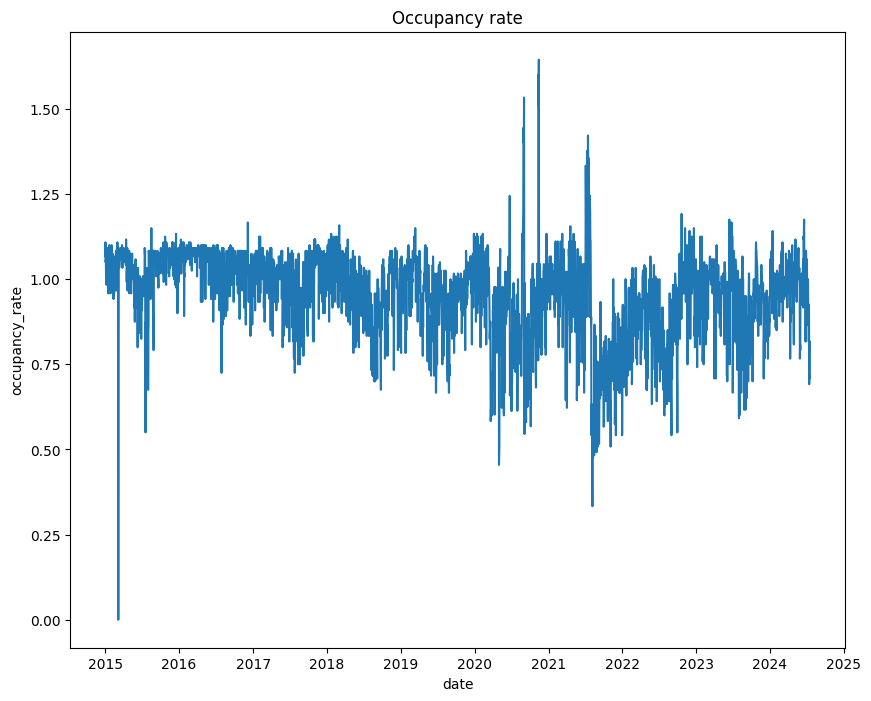

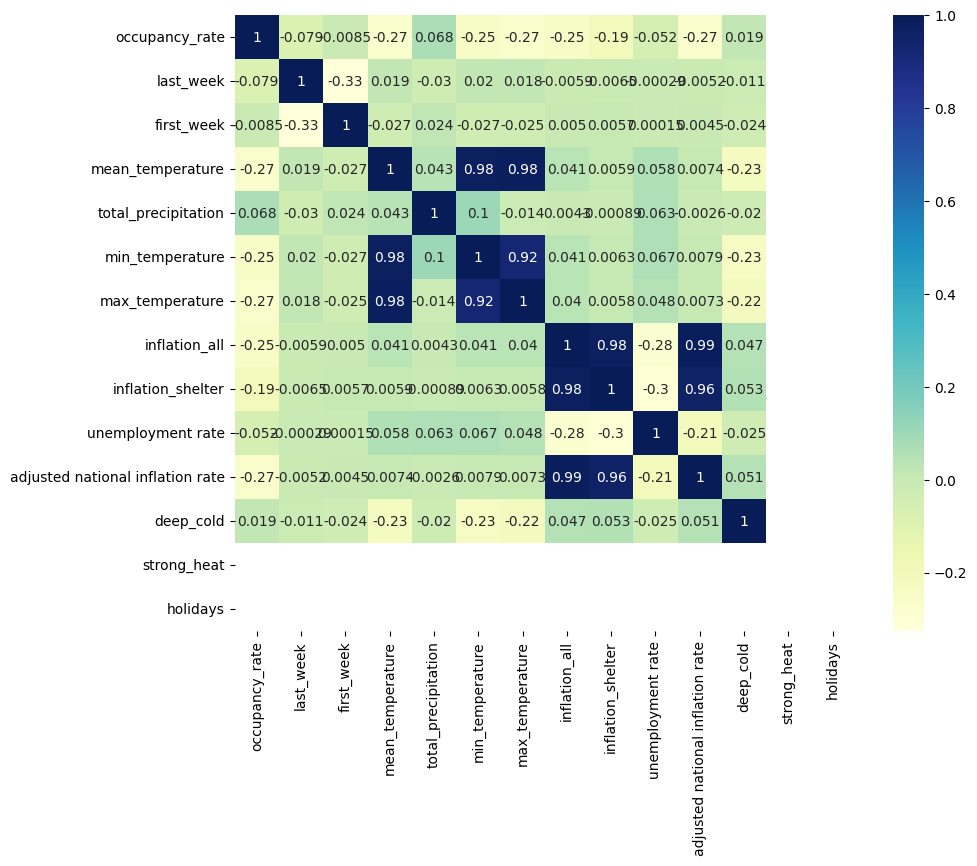

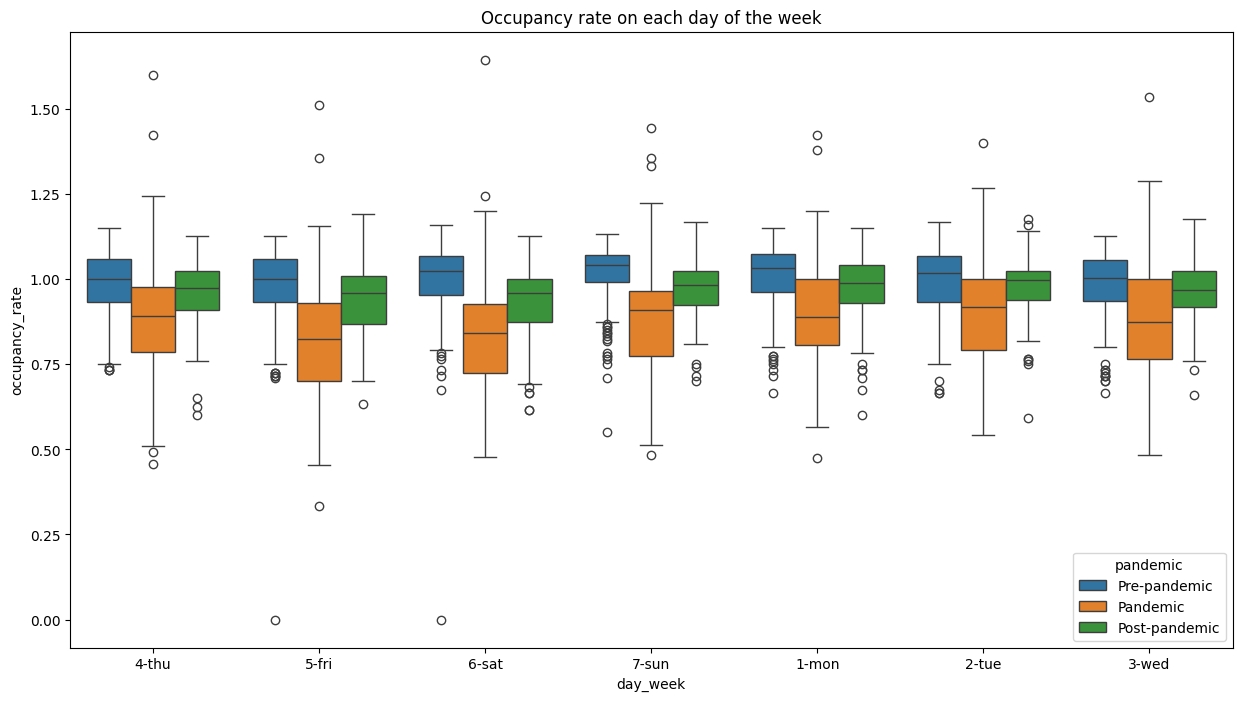

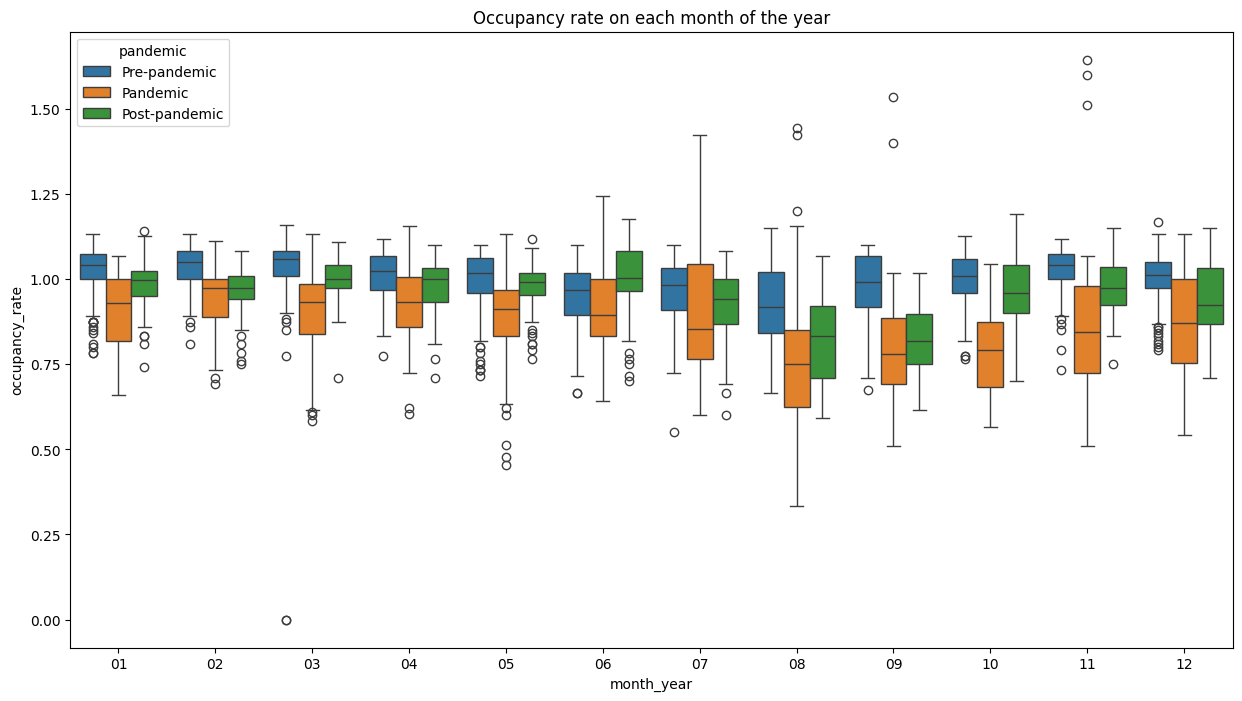

[0]	validation_0-rmse:0.45520	validation_1-rmse:0.47884


C:\Users\AShresth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:40:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.18829	validation_1-rmse:0.20708
[200]	validation_0-rmse:0.10434	validation_1-rmse:0.11955
[300]	validation_0-rmse:0.08174	validation_1-rmse:0.09441
[400]	validation_0-rmse:0.07532	validation_1-rmse:0.08685
[500]	validation_0-rmse:0.07240	validation_1-rmse:0.08465
[600]	validation_0-rmse:0.07052	validation_1-rmse:0.08369
[700]	validation_0-rmse:0.06870	validation_1-rmse:0.08337
[800]	validation_0-rmse:0.06698	validation_1-rmse:0.08276
[900]	validation_0-rmse:0.06512	validation_1-rmse:0.08223
[999]	validation_0-rmse:0.06348	validation_1-rmse:0.08186


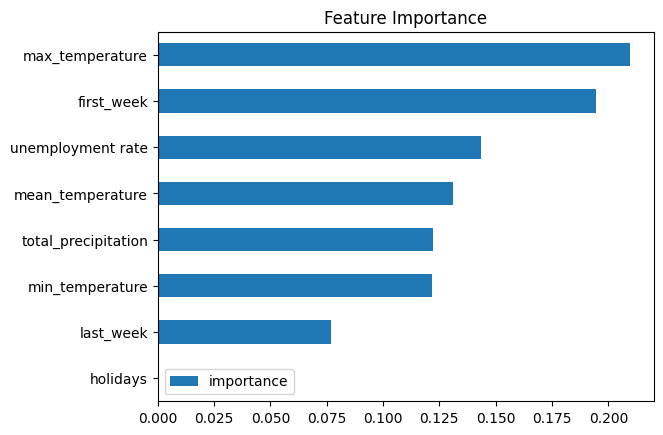

C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\4186564845.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


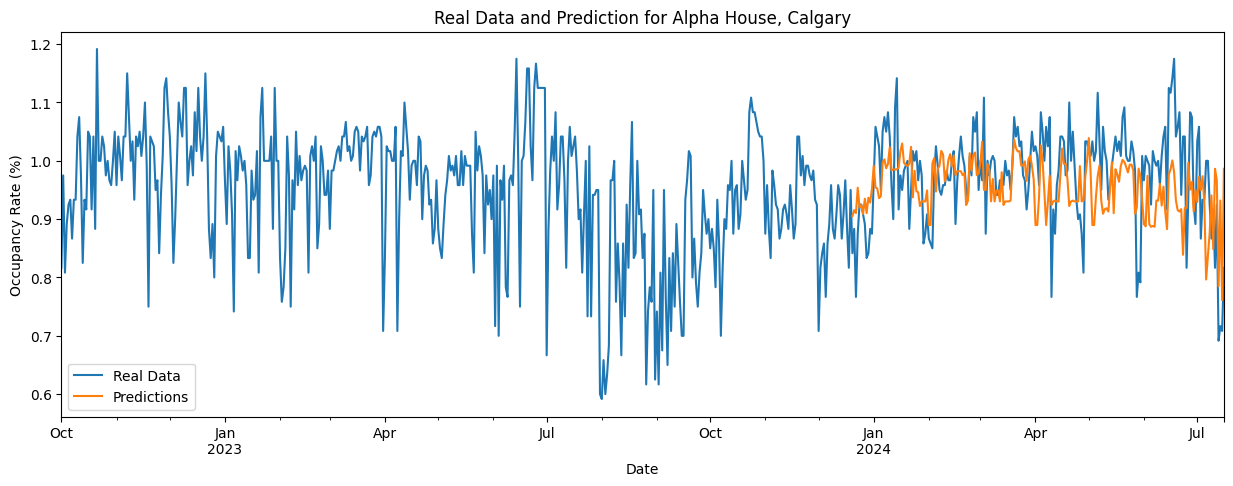

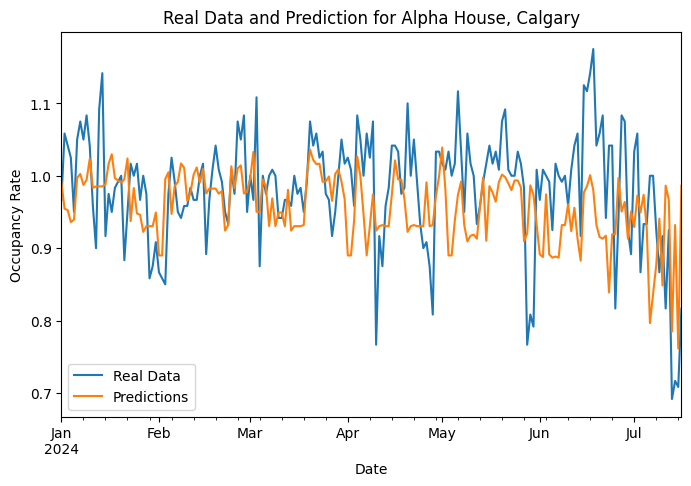

[0]	validation_0-rmse:0.45520	validation_1-rmse:0.47884


C:\Users\AShresth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:40:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.18829	validation_1-rmse:0.20708
[200]	validation_0-rmse:0.10434	validation_1-rmse:0.11955
[300]	validation_0-rmse:0.08174	validation_1-rmse:0.09441
[400]	validation_0-rmse:0.07532	validation_1-rmse:0.08685
[500]	validation_0-rmse:0.07240	validation_1-rmse:0.08465
[600]	validation_0-rmse:0.07052	validation_1-rmse:0.08369
[700]	validation_0-rmse:0.06870	validation_1-rmse:0.08337
[800]	validation_0-rmse:0.06698	validation_1-rmse:0.08276
[900]	validation_0-rmse:0.06512	validation_1-rmse:0.08223
[999]	validation_0-rmse:0.06348	validation_1-rmse:0.08186
Score across folds 0.0819
Fold scores:[np.float64(0.0818615228780031)]


In [29]:
'''
Alberta Analysis One Shelter
'''

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

df = df_orig
df['month_year'] = df['date'].dt.strftime('%m')

df['pandemic'] = "Pre-pandemic"
df.loc[(df['date'] >= '2020-03-11') & (df['date'] <= '2022-10-01'), 'pandemic'] = "Pandemic"
df.loc[(df['date'] > '2022-10-01'), 'pandemic'] = "Post-pandemic"
df["deep_cold"] = 0
df.loc[(df['min_temperature'] < -30), 'deep_cold'] = 1
df["strong_heat"] = 0
df.loc[(df['max_temperature'] > 38), 'strong_heat'] = 1

df = df.loc[df['ShelterName'] == 'Alpha House']

#Line Plot
fig, ax= plt.subplots(figsize = (10,8))
sns.lineplot(data=df, x="date", y="occupancy_rate")
ax.set_title("Occupancy rate")
plt.show()

#Heat map
df_heatmap = df
df_heatmap = df_heatmap[df_heatmap["pandemic"] == "Post-pandemic"]
df_heatmap = df[[ 'occupancy_rate', 'last_week', 'first_week', 'mean_temperature', 'total_precipitation', 'min_temperature',
       'max_temperature', 'inflation_all','inflation_shelter', 'unemployment rate','adjusted national inflation rate', 'deep_cold', 'strong_heat', 'holidays']]
plt.figure(figsize=(10,8))
ax.set_title('Correlation matrix post-pandemic')
sns.heatmap(df_heatmap.corr(), annot=True, cmap="YlGnBu")


#Box plots

fig, ax= plt.subplots(figsize = (15,8))
sns.boxplot(data=df, x="day_week", y="occupancy_rate", hue="pandemic")
ax.set_title("Occupancy rate on each day of the week")
plt.show()

fig, ax= plt.subplots(figsize = (15,8))
sns.boxplot(data=df, x="month_year", y="occupancy_rate", hue="pandemic")
ax.set_title("Occupancy rate on each month of the year")
plt.show()

#Split the data
df = df[df['date'] >= '2022-10-01']

df = df[df['occupancy_rate'].notna()]
df = df.set_index('date')

train = df.loc[df.index < '2023-12-20'] # Changed date from 2022-06-20 to 2023-06-20
test = df.loc[df.index >= '2023-12-20']

#Create model
FEATURES = [ 'last_week', 'first_week', 'mean_temperature', 'total_precipitation', 'min_temperature',
       'max_temperature', 'unemployment rate', 'holidays']
TARGET = "occupancy_rate"

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

#Perform the XGB Regression
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

fi.sort_values('importance').plot(kind='barh', title='Feature Importance')

plt.show()

#Forecast on test
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['occupancy_rate']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax)
plt.legend(['Real Data', 'Predictions'])
ax.set_title('Real Data and Prediction for Alpha House, Calgary')
plt.xlabel("Date")
plt.ylabel("Occupancy Rate (%)")
plt.show()

# Filter the data for dates after January 1, 2024
df_filtered = df[df.index >= '2024-01-01']

# Create the plot
ax = df_filtered[['occupancy_rate']].plot(figsize=(8, 5))
df_filtered['prediction'].plot(ax=ax)

# Customize the plot
plt.legend(['Real Data', 'Predictions'])
ax.set_title('Real Data and Prediction for Alpha House, Calgary')
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xlabel("Date")
plt.ylabel("Occupancy Rate")
plt.show()

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

fold = 0
preds = []
scores = []

y_pred = reg.predict(X_test)
preds.append(y_pred)
score = np.sqrt(mean_squared_error(y_test, y_pred))
scores.append(score)

print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')



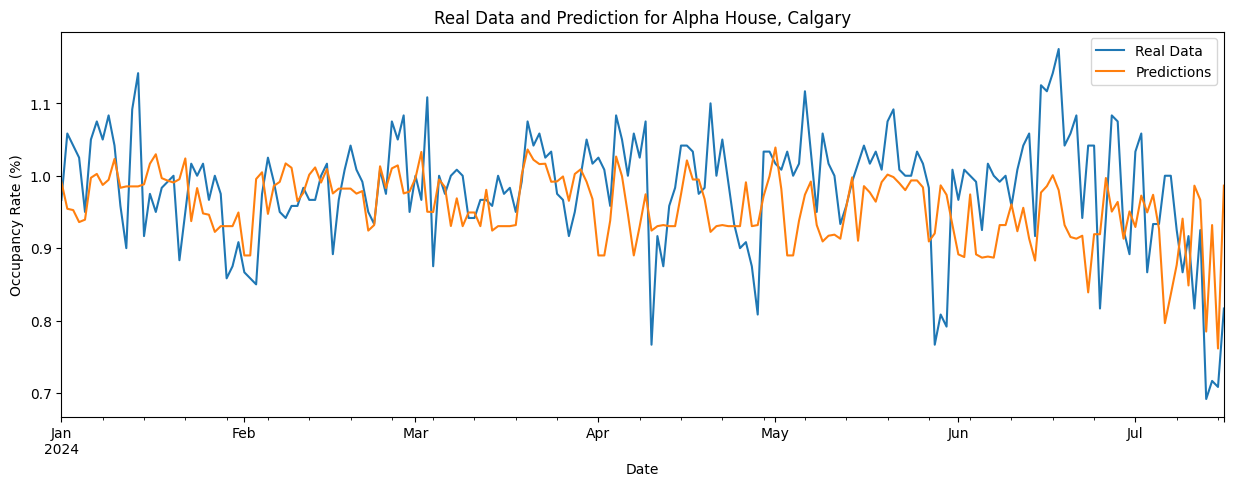

In [30]:
# prompt: plot occupancy rate and prediction on the same graph only after january 1, 2024

import matplotlib.pyplot as plt

# Filter the data for dates after January 1, 2024
df_filtered = df[df.index >= '2024-01-01']

# Create the plot
ax = df_filtered[['occupancy_rate']].plot(figsize=(15, 5))
df_filtered['prediction'].plot(ax=ax)

# Customize the plot
plt.legend(['Real Data', 'Predictions'])
ax.set_title('Real Data and Prediction for Alpha House, Calgary')
plt.xlabel("Date")
plt.ylabel("Occupancy Rate (%)")
plt.show()


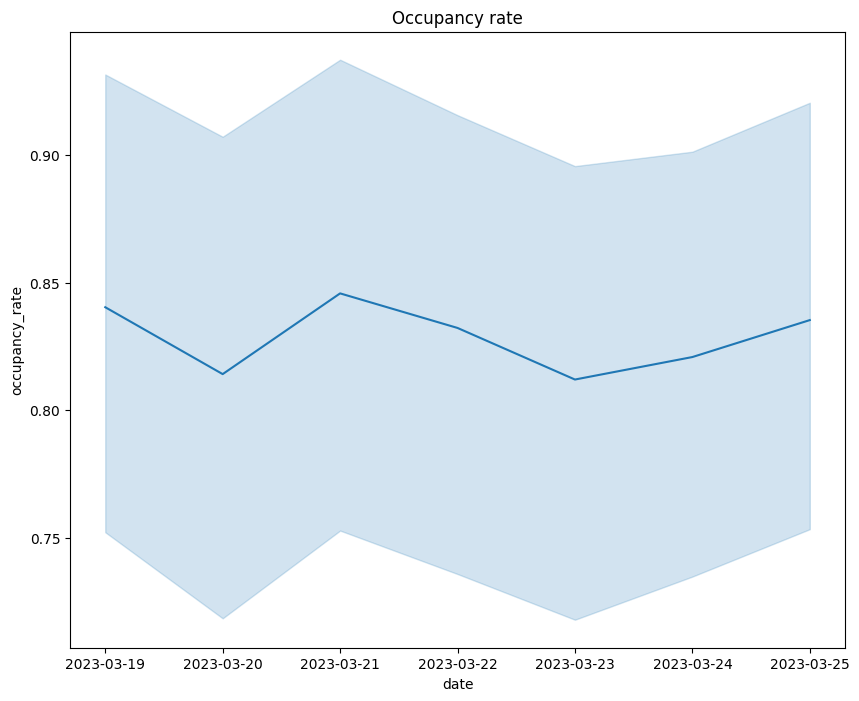

In [31]:
'''
Alberta Analysis One Shelter
'''

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

df = df_orig
df['month_year'] = df['date'].dt.strftime('%m')

df['pandemic'] = "Pre-pandemic"
df.loc[(df['date'] >= '2020-03-11') & (df['date'] <= '2022-10-01'), 'pandemic'] = "Pandemic"
df.loc[(df['date'] > '2022-10-01'), 'pandemic'] = "Post-pandemic"
df["deep_cold"] = 0
df.loc[(df['min_temperature'] < -30), 'deep_cold'] = 1
df["strong_heat"] = 0
df.loc[(df['max_temperature'] > 38), 'strong_heat'] = 1

df = df[df['date'] >= '2023-03-19']
df = df[df['date'] <= '2023-03-25']

df = df[df['occupancy_rate'].notna()]
df = df.set_index('date')

#df = df.loc[df['ShelterName'] == 'YW Calgary Emergency']

#Line Plot
fig, ax= plt.subplots(figsize = (10,8))
sns.lineplot(data=df, x="date", y="occupancy_rate")
ax.set_title("Occupancy rate")
plt.show()

df['avg_occupancy'] = df.groupby(['ShelterName'])['Capacity'].transform('mean')


In [32]:
import pandas as pd
if 'date' in df_orig.columns:
  df_orig['year'] = pd.to_datetime(df_orig['date']).dt.year
  df_filtered = df_orig[df_orig['year'] > 2022]
  average_capacity = df_filtered.groupby('ShelterName')['Capacity'].mean().sort_values().head(50)
  print(average_capacity)
else:
  print("No 'date' column found in the DataFrame.")

ShelterName
Reflections Society for Empowering People to Succeed - Wildfire      5.000000
Reflections Society for Empowering People to Succeed                 5.000000
Wapiti House - Winter                                               10.000000
Wapiti House - Women's Intox                                        10.000000
Mustard Seed Red Deer - Female only                                 11.000000
Slave Lake Homeless Coalition Shelter                               12.000000
Lakeland Out of the Elements                                        12.273535
Veterans - Short Term Supportive                                    15.000000
Elder's Caring Shelter - Short Term Supportive                      18.000000
Wagner Centre                                                       18.000000
Sagitawa Friendship Centre - Out of the Cold Shelter                20.000000
John Howard Society - Wildfire                                      20.000000
John Howard Society                                 

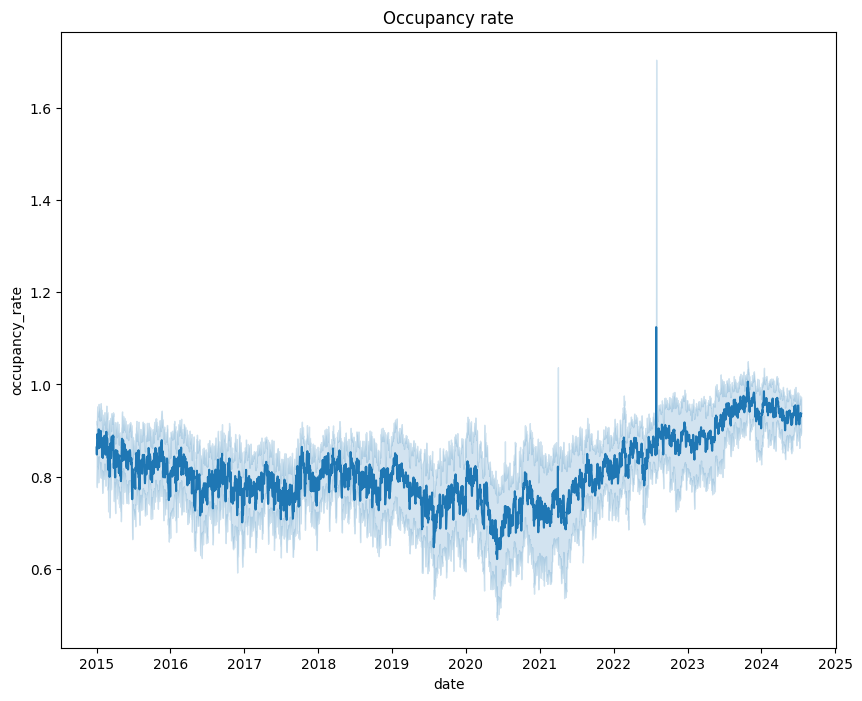

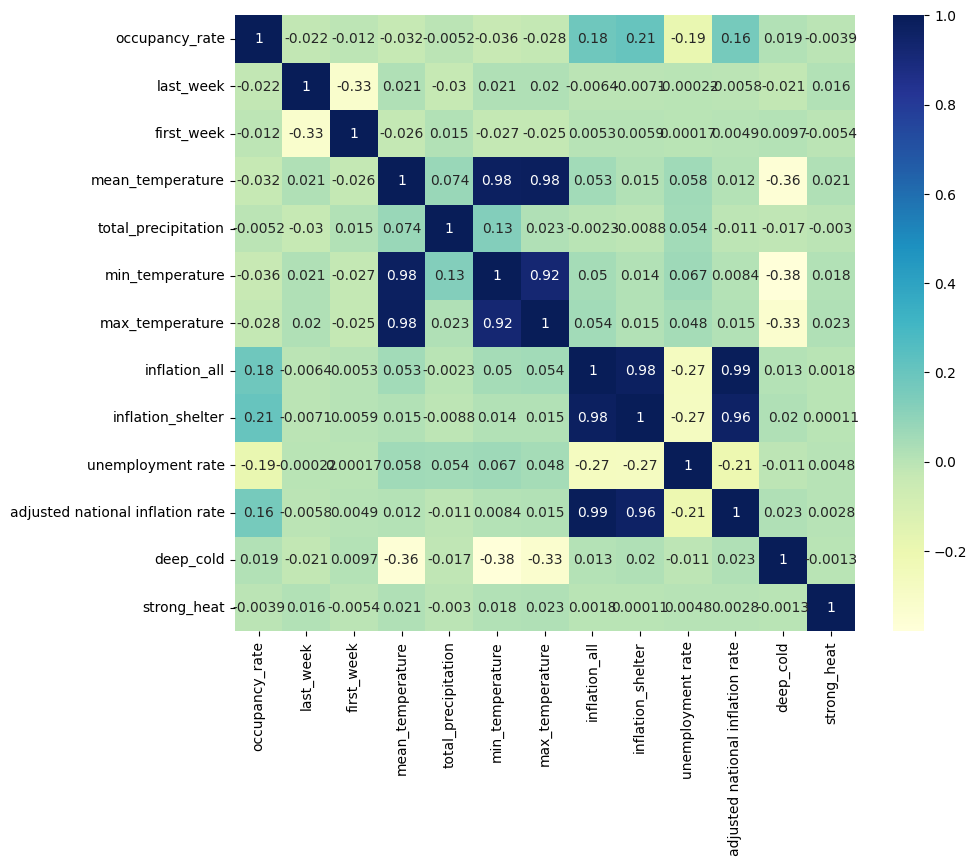

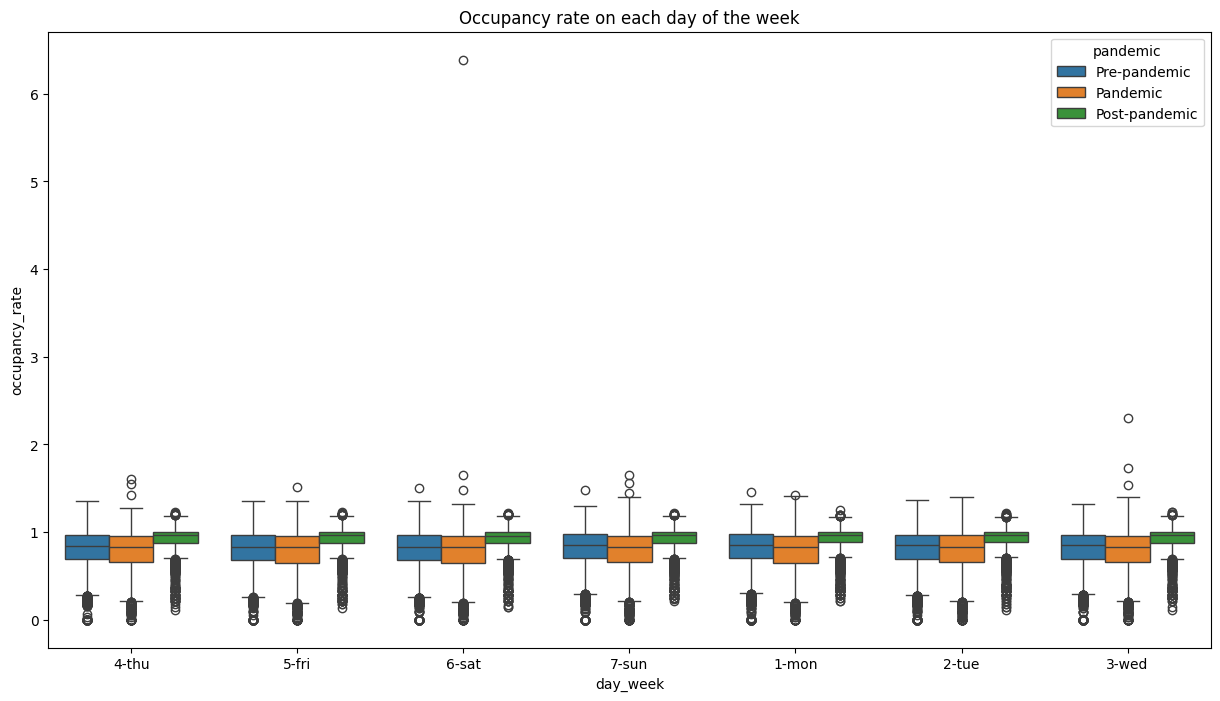

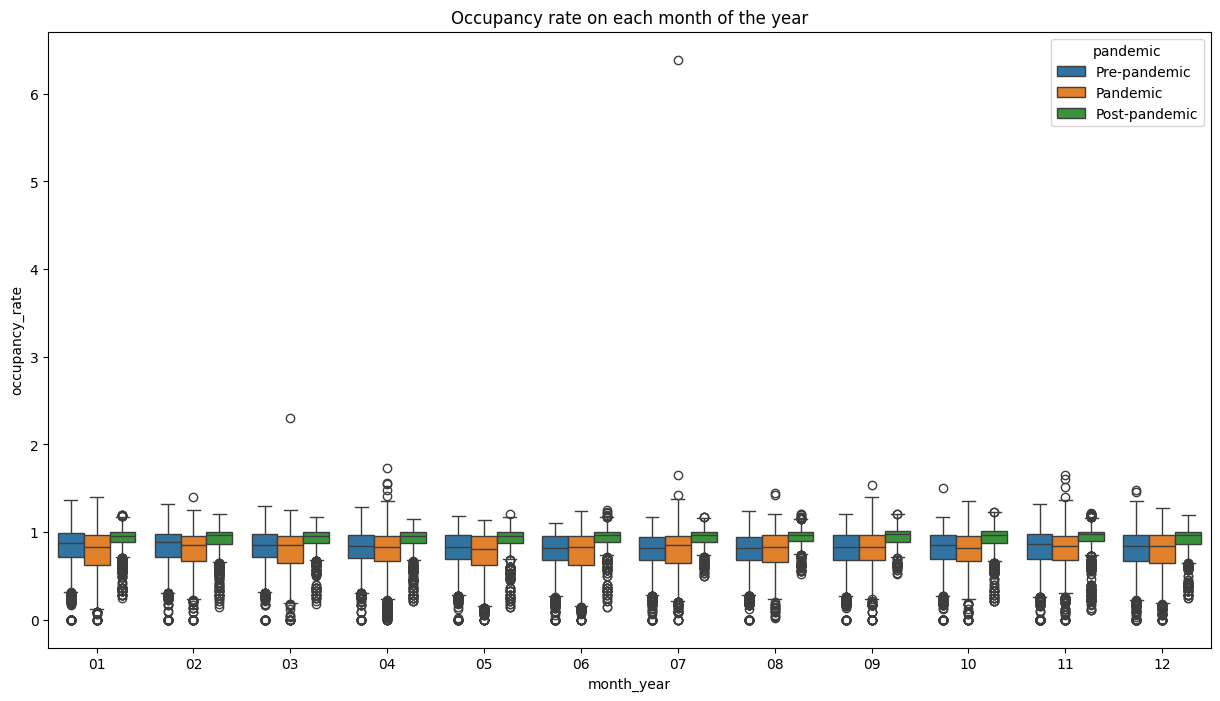

[0]	validation_0-rmse:0.42719	validation_1-rmse:0.45846


C:\Users\AShresth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:47:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.23595	validation_1-rmse:0.24492
[200]	validation_0-rmse:0.19549	validation_1-rmse:0.19357
[300]	validation_0-rmse:0.18875	validation_1-rmse:0.17664
[400]	validation_0-rmse:0.18711	validation_1-rmse:0.17413
[460]	validation_0-rmse:0.18656	validation_1-rmse:0.17436


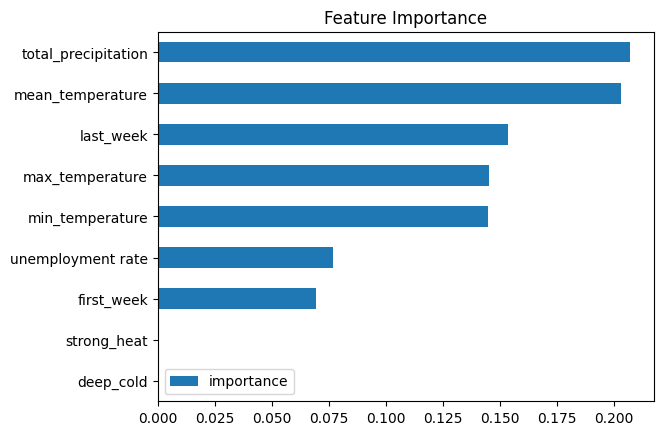

C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\3839048386.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


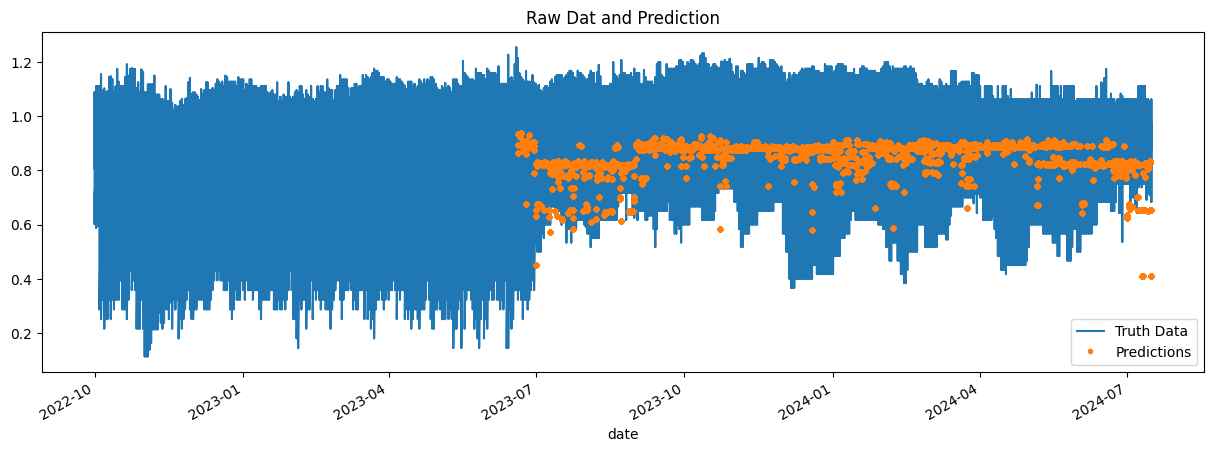

In [33]:
'''
Alberta Analysis Every Shelter
'''

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

df = df_orig
df['month_year'] = df['date'].dt.strftime('%m')

df['pandemic'] = "Pre-pandemic"
df.loc[(df['date'] >= '2020-03-11') & (df['date'] <= '2022-10-01'), 'pandemic'] = "Pandemic"
df.loc[(df['date'] > '2022-10-01'), 'pandemic'] = "Post-pandemic"
df["deep_cold"] = 0
df.loc[(df['min_temperature'] < -30), 'deep_cold'] = 1
df["strong_heat"] = 0
df.loc[(df['max_temperature'] > 38), 'strong_heat'] = 1

#keep only shelters represented during every week
df['ShelterName_count'] = df.groupby('ShelterName')['ShelterName'].transform('count')
df = df[df['ShelterName_count'] > 3300]

#Line Plot
fig, ax= plt.subplots(figsize = (10,8))
sns.lineplot(data=df, x="date", y="occupancy_rate")
ax.set_title("Occupancy rate")
plt.show()

#Heat map
df_heatmap = df
df_heatmap = df_heatmap[df_heatmap["pandemic"] == "Post-pandemic"]
df_heatmap = df[[ 'occupancy_rate', 'last_week', 'first_week', 'mean_temperature', 'total_precipitation', 'min_temperature',
       'max_temperature', 'inflation_all','inflation_shelter', 'unemployment rate','adjusted national inflation rate', 'deep_cold', 'strong_heat']]
plt.figure(figsize=(10,8))
ax.set_title('Correlation matrix post-pandemic')
sns.heatmap(df_heatmap.corr(), annot=True, cmap="YlGnBu")

#Box plots
fig, ax= plt.subplots(figsize = (15,8))
sns.boxplot(data=df, x="day_week", y="occupancy_rate", hue="pandemic")
ax.set_title("Occupancy rate on each day of the week")
plt.show()

fig, ax= plt.subplots(figsize = (15,8))
sns.boxplot(data=df, x="month_year", y="occupancy_rate", hue="pandemic")
ax.set_title("Occupancy rate on each month of the year")
plt.show()

#Split the data
df = df[df['date'] >= '2022-10-01']

df = df[df['occupancy_rate'].notna()]
df = df.set_index('date')

train = df.loc[df.index < '2023-06-20'] # Changed date from 2022-06-20 to 2023-06-20
test = df.loc[df.index >= '2023-06-20']

#Create model
FEATURES = [ 'last_week', 'first_week', 'mean_temperature', 'total_precipitation', 'min_temperature',
       'max_temperature', 'unemployment rate', 'deep_cold', 'strong_heat']
TARGET = "occupancy_rate"

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

#Perform the XGB Regression
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

fi.sort_values('importance').plot(kind='barh', title='Feature Importance')

plt.show()

#Forecast on test
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['occupancy_rate']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()


In [36]:
#analyze Toronto data

import pandas as pd
import os
import holidays

# Get the Downloads folder path
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

# Define the path to the Toronto CSV file in Downloads
input_file = os.path.join(downloads_path, "output_toronto.csv")

# Load the Toronto data into a DataFrame
df_orig = pd.read_csv(input_file)

# Display the DataFrame
df_orig

C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\173875691.py:14: DtypeWarning: Columns (1,2,3,4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv(input_file)


,date,city_x,ShelterType,ShelterName,Organization,Capacity,Overnight,year,month,unoccupied,...,min_temperature,max_temperature,province,x,y,CMA,inflation_all,inflation_shelter,unemployment rate,adjusted national inflation rate
0,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01,NaN,...,-11.1,-2.7,AB,-115.066667,51.083333,Toronto,126.3,134.0,4.8,166.8
1,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01,NaN,...,-6.1,1.1,AB,-114.013333,51.122500,Toronto,126.3,134.0,4.8,166.8
2,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01,NaN,...,-15.4,-5.0,AB,-110.283333,54.416667,Toronto,126.3,134.0,4.8,166.8
3,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01,NaN,...,-9.2,3.1,AB,-113.605836,53.306667,Toronto,126.3,134.0,4.8,166.8
4,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01,NaN,...,-4.1,3.1,AB,-116.465000,53.578889,Toronto,126.3,134.0,4.8,166.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868328,2024-07-31,Toronto,Shelter,YWCA Davenport Shelter,YWCA Toronto,27.0,27.0,2024.0,2024-07,0.0,...,23.3,32.2,ON,-79.396111,43.627500,Toronto,166.1,187.6,7.7,211.8
2868329,2024-07-31,Etobicoke,Shelter,Youth Without Shelter,Youth Without Shelter,33.0,33.0,2024.0,2024-07,0.0,...,23.3,32.2,ON,-79.396111,43.627500,Toronto,166.1,187.6,7.7,211.8
2868330,2024-07-31,Etobicoke,Shelter,Youth Without Shelter,Youth Without Shelter,20.0,20.0,2024.0,2024-07,0.0,...,23.3,32.2,ON,-79.396111,43.627500,Toronto,166.1,187.6,7.7,211.8
2868331,2024-07-31,Scarborough,Shelter,YouthLink,YouthLink,10.0,10.0,2024.0,2024-07,0.0,...,23.3,32.2,ON,-79.396111,43.627500,Toronto,166.1,187.6,7.7,211.8


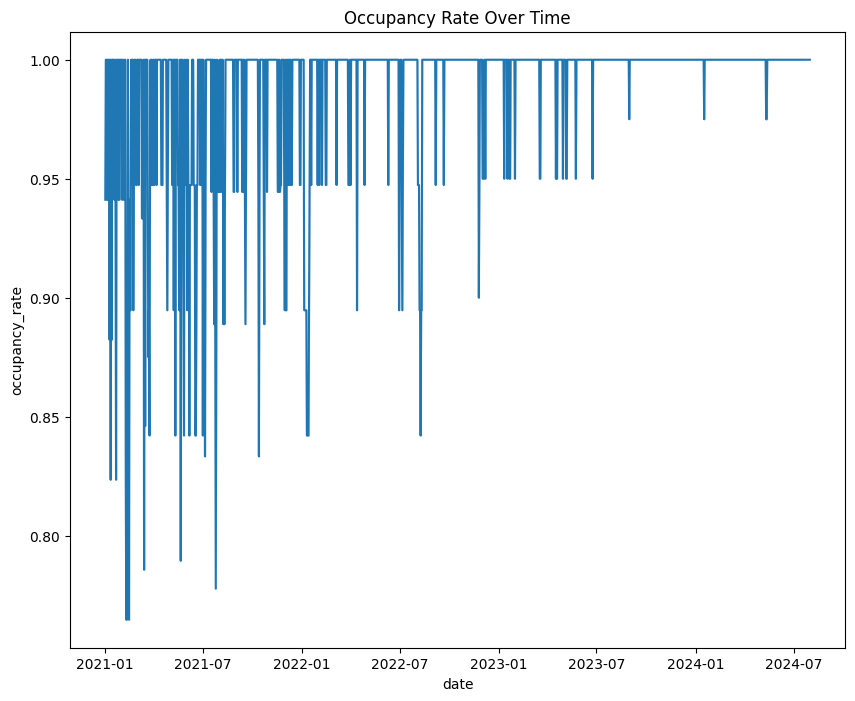

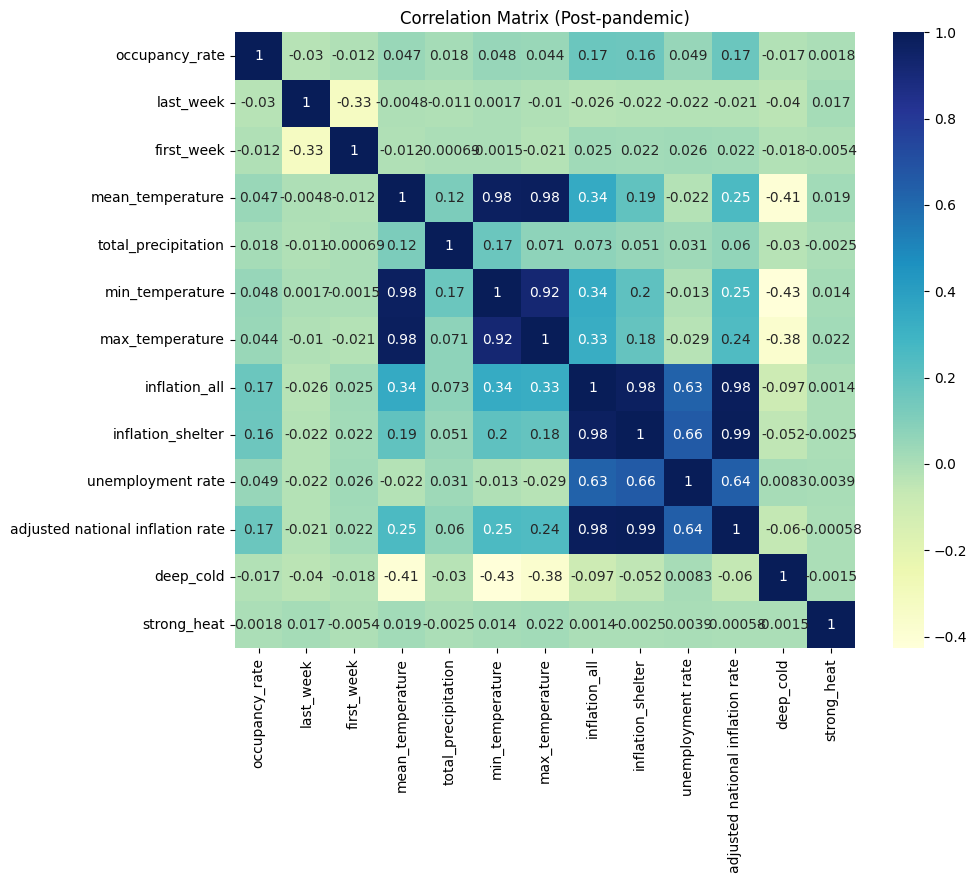

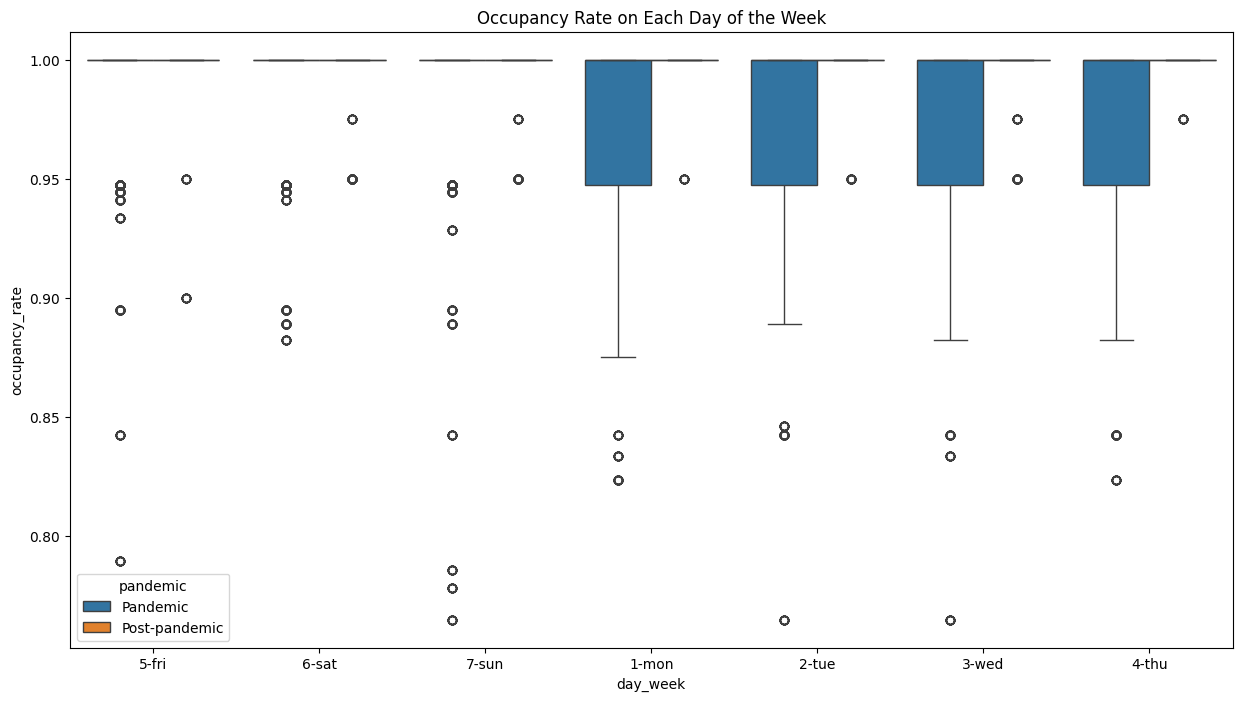

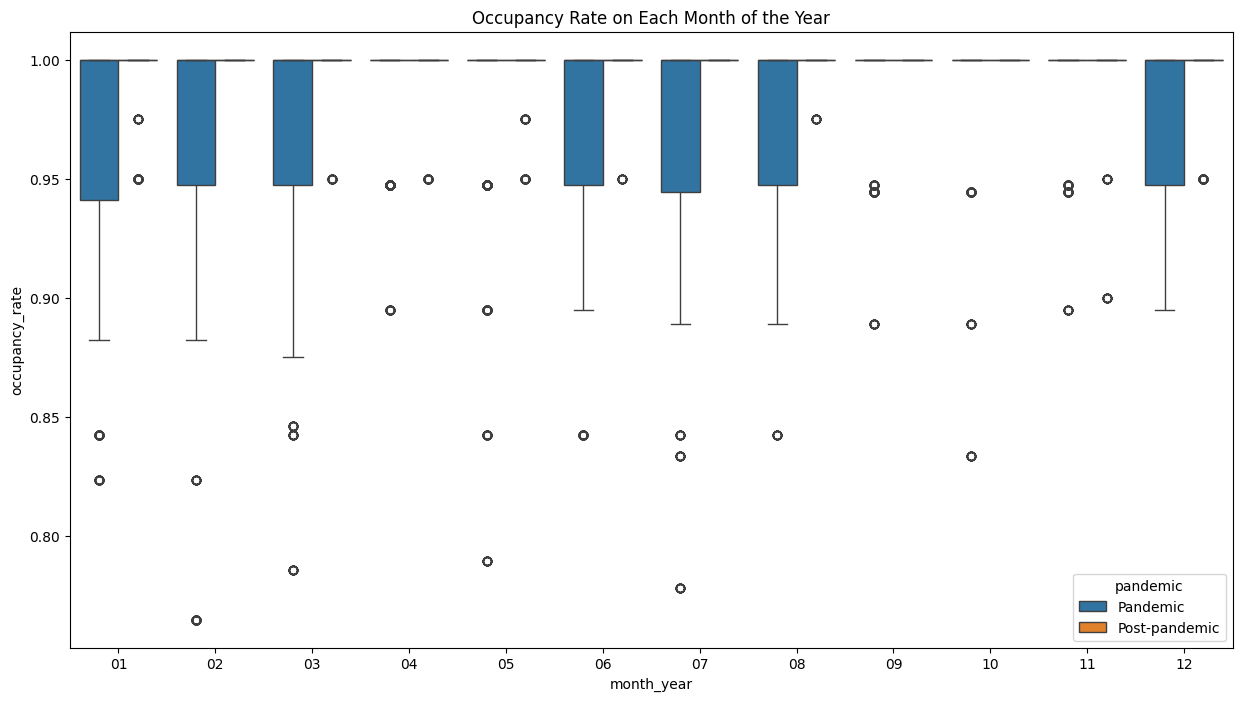

[0]	validation_0-rmse:0.49141	validation_1-rmse:0.49467
[100]	validation_0-rmse:0.18039	validation_1-rmse:0.18333
[200]	validation_0-rmse:0.06730	validation_1-rmse:0.07019
[300]	validation_0-rmse:0.02763	validation_1-rmse:0.03043
[400]	validation_0-rmse:0.01579	validation_1-rmse:0.01679
[500]	validation_0-rmse:0.01327	validation_1-rmse:0.01213
[600]	validation_0-rmse:0.01278	validation_1-rmse:0.01071
[700]	validation_0-rmse:0.01260	validation_1-rmse:0.01015
[800]	validation_0-rmse:0.01245	validation_1-rmse:0.00976
[900]	validation_0-rmse:0.01229	validation_1-rmse:0.00964
[915]	validation_0-rmse:0.01227	validation_1-rmse:0.00966


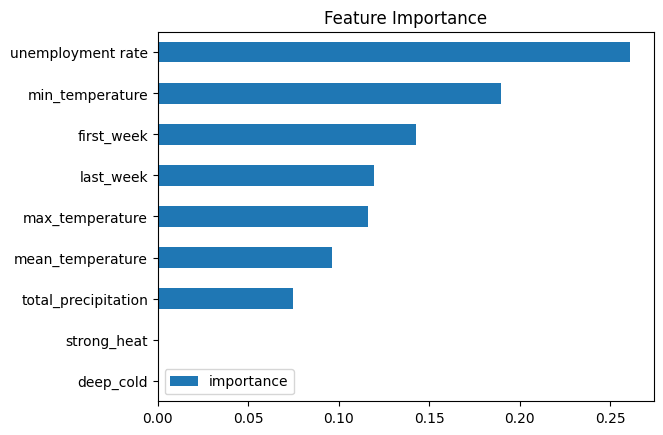

C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\2021236701.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


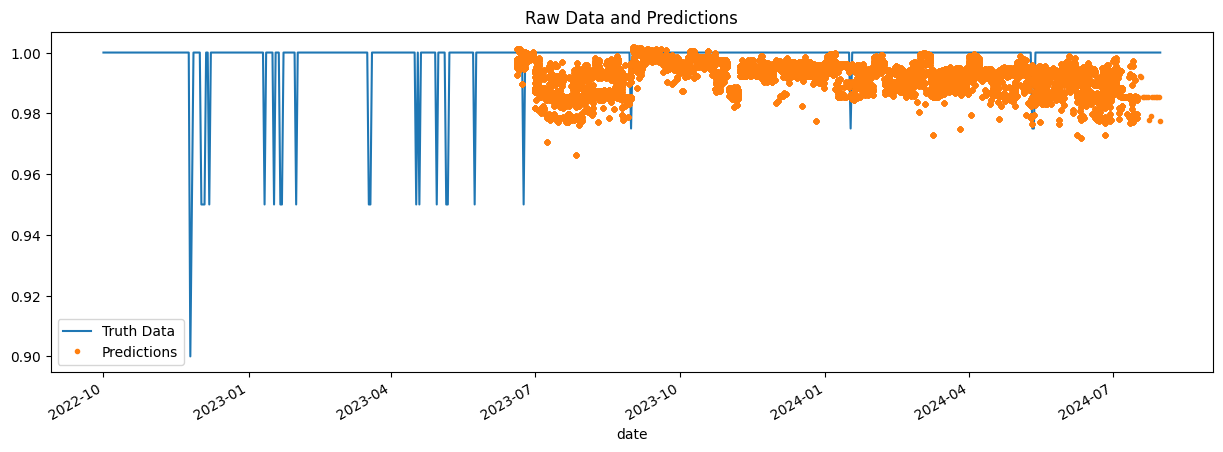

In [39]:
'''
Toronto Analysis One Shelter
'''

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Ensure the DataFrame is properly loaded
df = df_orig.copy()

# Fix: Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Fix: Ensure month-year extraction works
df['month_year'] = df['date'].dt.strftime('%m')

# Fix: Handle missing values in 'date' before using .loc
df['pandemic'] = "Pre-pandemic"
df.loc[(df['date'] >= '2020-03-11') & (df['date'] <= '2022-10-01'), 'pandemic'] = "Pandemic"
df.loc[(df['date'] > '2022-10-01'), 'pandemic'] = "Post-pandemic"

df["deep_cold"] = 0
df.loc[df['min_temperature'] < -30, 'deep_cold'] = 1

df["strong_heat"] = 0
df.loc[df['max_temperature'] > 38, 'strong_heat'] = 1

# Fix: Ensure the shelter exists in data
df = df[df['ShelterName'] == "Vanauley Street YMCA Emergency Shelter"]

# Line Plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x="date", y="occupancy_rate")
ax.set_title("Occupancy Rate Over Time")
plt.show()

# Heat Map (Only for Post-pandemic period)
df_heatmap = df[df["pandemic"] == "Post-pandemic"]

# Select relevant numerical columns for correlation analysis
heatmap_columns = [
    'occupancy_rate', 'last_week', 'first_week', 'mean_temperature', 
    'total_precipitation', 'min_temperature', 'max_temperature', 
    'inflation_all', 'inflation_shelter', 'unemployment rate',
    'adjusted national inflation rate', 'deep_cold', 'strong_heat'
]

df_heatmap = df_heatmap[heatmap_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix (Post-pandemic)')
plt.show()

# Box plots
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=df, x="day_week", y="occupancy_rate", hue="pandemic")
ax.set_title("Occupancy Rate on Each Day of the Week")
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=df, x="month_year", y="occupancy_rate", hue="pandemic")
ax.set_title("Occupancy Rate on Each Month of the Year")
plt.show()

# Split the data for training and testing
df = df[df['date'] >= '2022-10-01']
df = df[df['occupancy_rate'].notna()]
df = df.set_index('date')

train = df.loc[df.index < '2023-06-20']
test = df.loc[df.index >= '2023-06-20']

# Define Features & Target
FEATURES = [
    'last_week', 'first_week', 'mean_temperature', 'total_precipitation', 
    'min_temperature', 'max_temperature', 'unemployment rate', 
    'deep_cold', 'strong_heat'
]
TARGET = "occupancy_rate"

X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

# XGBoost Regression Model (Fix deprecated 'reg:linear' -> 'reg:squarederror')
reg = xgb.XGBRegressor(
    base_score=0.5, booster='gbtree', n_estimators=1000,
    early_stopping_rounds=50, objective='reg:squarederror',
    max_depth=3, learning_rate=0.01
)

reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

# Feature Importance Plot
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Forecast on test data
test['prediction'] = reg.predict(X_test)

# Merge predictions
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# Plot True vs Predicted Values
ax = df[['occupancy_rate']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()


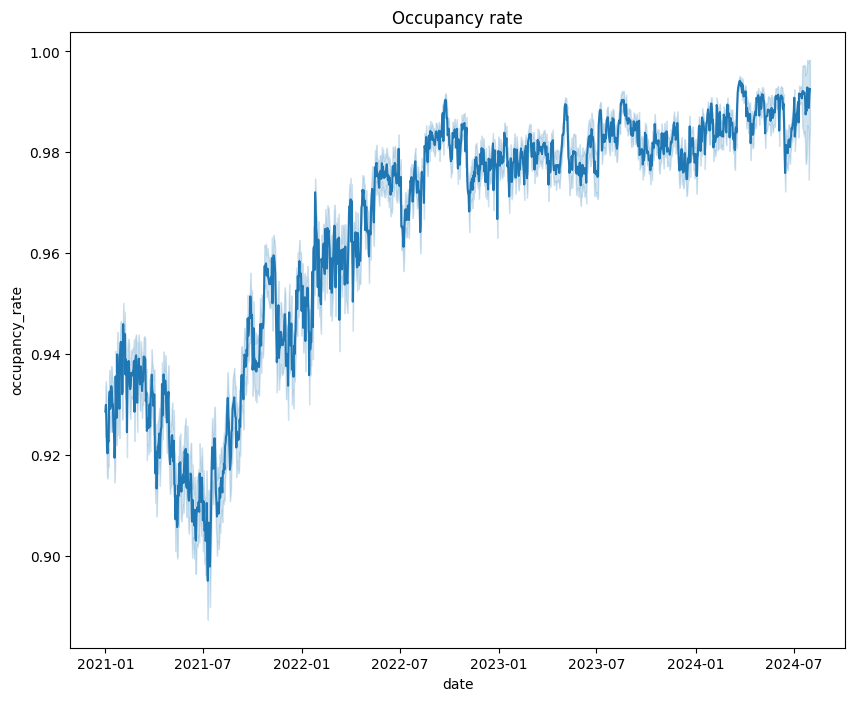

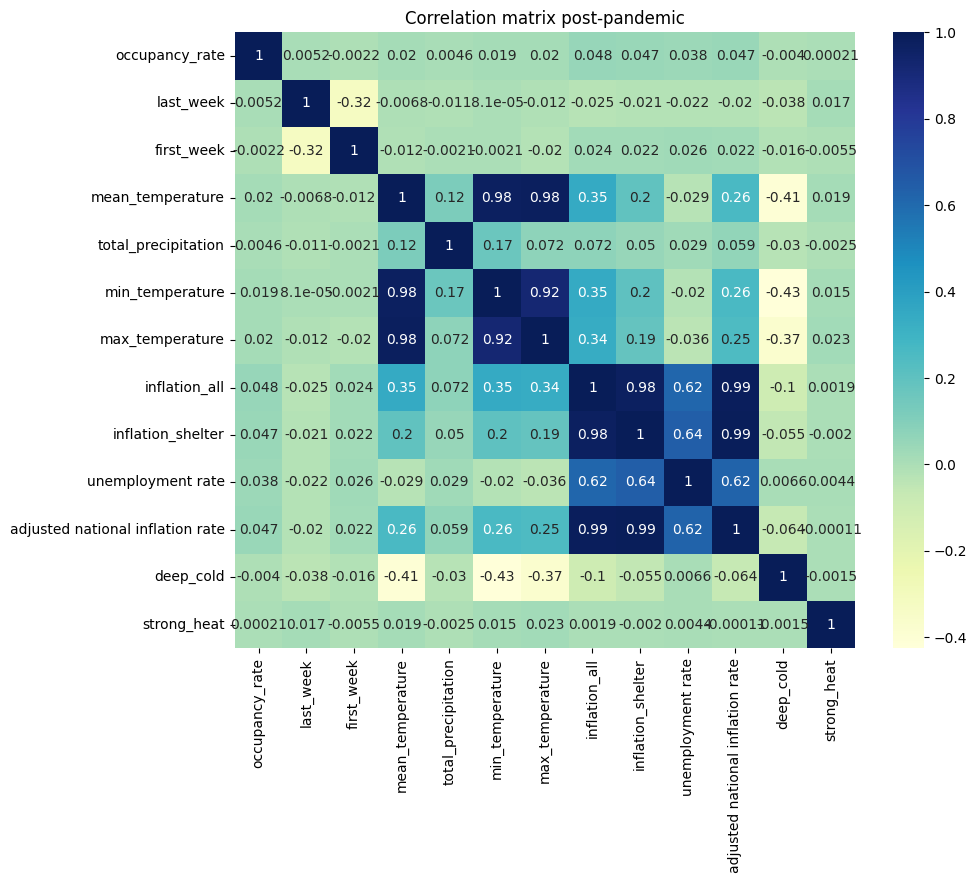

C:\Users\AShresth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


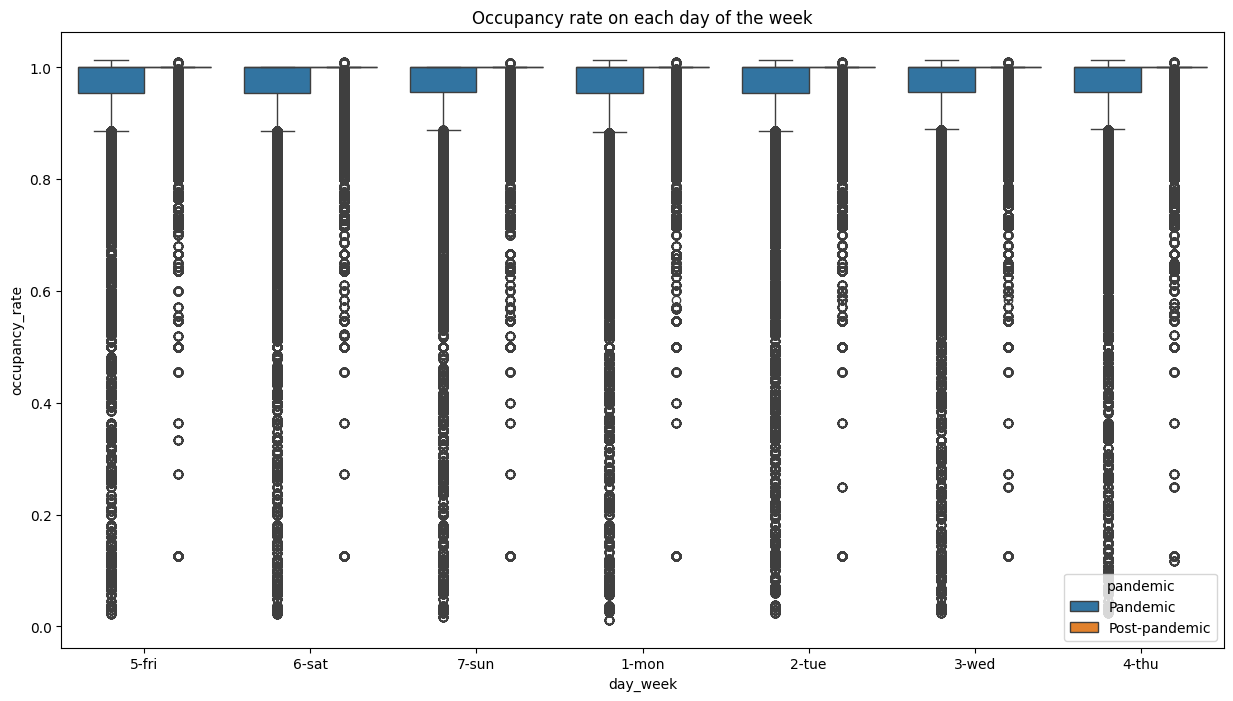

C:\Users\AShresth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


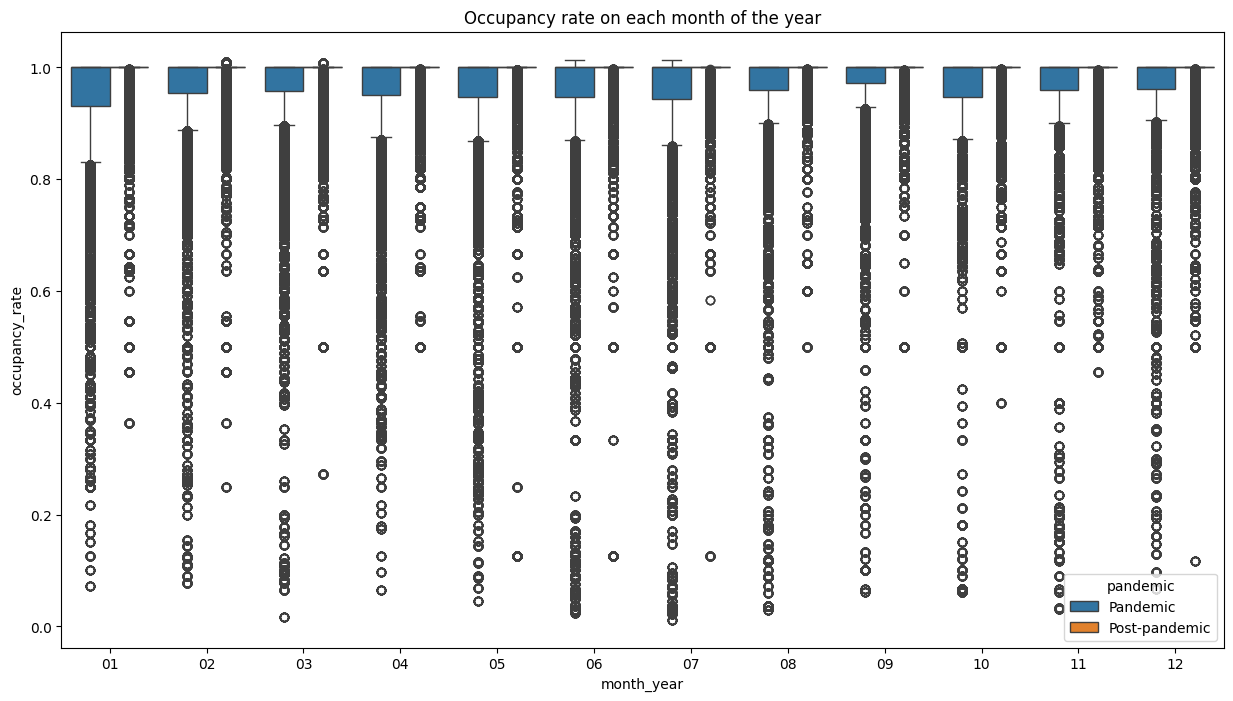

[0]	validation_0-rmse:0.47916	validation_1-rmse:0.48288
[100]	validation_0-rmse:0.18695	validation_1-rmse:0.18759
[200]	validation_0-rmse:0.09419	validation_1-rmse:0.08901
[300]	validation_0-rmse:0.07333	validation_1-rmse:0.06314
[400]	validation_0-rmse:0.07006	validation_1-rmse:0.05790
[500]	validation_0-rmse:0.06961	validation_1-rmse:0.05681
[600]	validation_0-rmse:0.06954	validation_1-rmse:0.05654
[700]	validation_0-rmse:0.06953	validation_1-rmse:0.05646
[800]	validation_0-rmse:0.06953	validation_1-rmse:0.05643
[900]	validation_0-rmse:0.06953	validation_1-rmse:0.05643
[999]	validation_0-rmse:0.06953	validation_1-rmse:0.05641


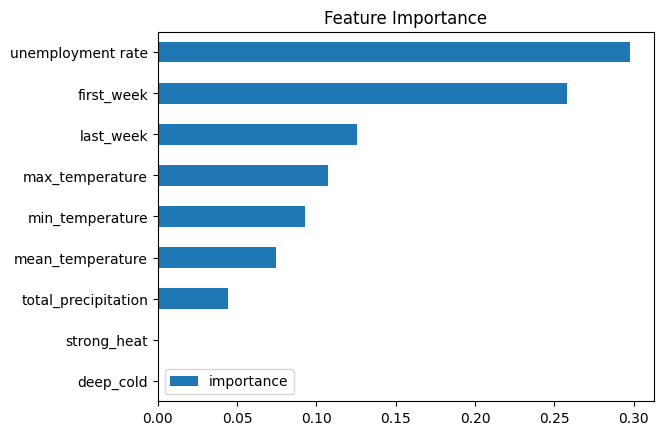

C:\Users\AShresth\AppData\Local\Temp\ipykernel_14944\802502448.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [ ]:
'''
Toronto Analysis Every Shelter
'''

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Ensure df_orig is a valid DataFrame
df = df_orig.copy()

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create 'month_year' column
df['month_year'] = df['date'].dt.strftime('%m')

# Define pandemic periods
df['pandemic'] = "Pre-pandemic"
df.loc[(df['date'] >= '2020-03-11') & (df['date'] <= '2022-10-01'), 'pandemic'] = "Pandemic"
df.loc[(df['date'] > '2022-10-01'), 'pandemic'] = "Post-pandemic"

# Define extreme temperature indicators
df["deep_cold"] = (df['min_temperature'] < -30).astype(int)
df["strong_heat"] = (df['max_temperature'] > 38).astype(int)

# Keep only shelters represented every week
df['ShelterName_count'] = df.groupby('ShelterName')['ShelterName'].transform('count')
df = df[df['ShelterName_count'] > 3300]

# Line Plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x="date", y="occupancy_rate")
ax.set_title("Occupancy rate")
plt.show()

# Heatmap
df_heatmap = df[df["pandemic"] == "Post-pandemic"]
df_heatmap = df_heatmap[['occupancy_rate', 'last_week', 'first_week', 'mean_temperature', 'total_precipitation', 
                         'min_temperature', 'max_temperature', 'inflation_all', 'inflation_shelter', 
                         'unemployment rate', 'adjusted national inflation rate', 'deep_cold', 'strong_heat']]
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation matrix post-pandemic')
plt.show()

# Box plots
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=df, x="day_week", y="occupancy_rate", hue="pandemic")
ax.set_title("Occupancy rate on each day of the week")
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=df, x="month_year", y="occupancy_rate", hue="pandemic")
ax.set_title("Occupancy rate on each month of the year")
plt.show()

# Filter data for post-pandemic
df = df[df['date'] >= '2022-10-01']

# Remove NaN occupancy_rate
df = df[df['occupancy_rate'].notna()]
df = df.set_index('date')

# Train-test split
train = df.loc[df.index < '2023-06-20']
test = df.loc[df.index >= '2023-06-20']

# Define features and target
FEATURES = ['last_week', 'first_week', 'mean_temperature', 'total_precipitation', 'min_temperature',
            'max_temperature', 'unemployment rate', 'deep_cold', 'strong_heat']
TARGET = "occupancy_rate"

X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

# XGBoost Model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000, early_stopping_rounds=50,
                       objective='reg:squarederror', max_depth=3,
                       learning_rate=0.01)

reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

# Feature Importance Plot
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Predictions
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# Plot actual vs predicted
ax = df[['occupancy_rate']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()




In [1]:
# prompt: count instances of sheltername_count

df_orig['ShelterName_count'].value_counts()
df

NameError: name 'df_orig' is not defined

In [ ]:
# prompt: find unique values of sheltername if sheltername_count ==1308

df_orig[df_orig['ShelterName_count'] == 1308]['ShelterName'].unique()


array(['CONC Etobicoke Hotel Program', 'CONC West End Hotel Program',
       "CONC Men's Shelter Lansdowne Ave",
       "CONC Men's Shelter Bloor St W", 'Christie Refugee Welcome Centre',
       'Robertson House', 'Cornerstone Place', 'Covenant House McGill St',
       'Dixon Hall 351 Lake Shore Blvd E Respite', "Eva's Phoenix",
       'Fife House Denison Ave', 'Fife House Sherbourne St',
       'Fred Victor Centre Transition to Housing Dundas St E',
       'Fred Victor Mary Sheffield House',
       'Fred Victor Centre Bethlehem United Shelter',
       'Fred Victor Centre 1A Strachan Ave Respite',
       'Good Shepherd Centre Barrett House',
       'Good Shepherd Centre West End Hotel Program',
       "HFS Kennedy Rd Women's Shelter", 'HFS St. Clair Ave E Shelter',
       'Horizons for Youth', 'Kennedy House Youth Shelter',
       "Margaret's 21 Park Rd Respite ", 'Sagatay ',
       'Native Child & Family Services Toronto', 'SVDP Amelie House',
       'SVDP Elisa House', "SVDP Mary's H